In [ ]:
import sys
import os
%pip install spacy

if sys.platform.startswith('win'):
    os.system('python -m spacy download en_core_web_md')
elif sys.platform.startswith('darwin') or sys.platform.startswith('linux'):
    os.system('python3 -m spacy download en_core_web_md')

In [ ]:
# This value controls the number of most common words to display
count_of_words = 10

5 most common nouns, adjectives, and verbs for books/Marlowe-corpus/3HVI-MIT (CL).txt


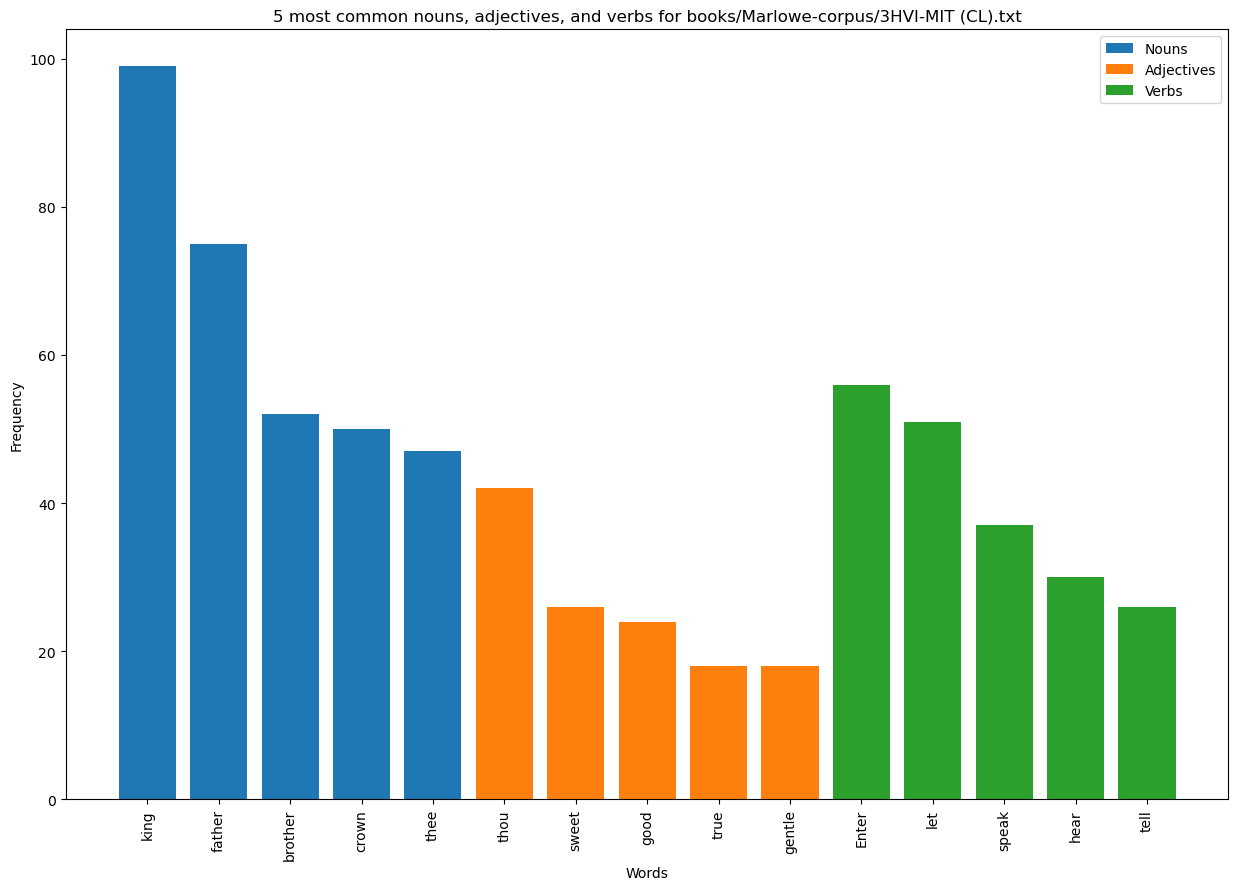

5 most common nouns, adjectives, and verbs for books/Marlowe-corpus/EMED-DrFaust-reg-3 (CL).txt


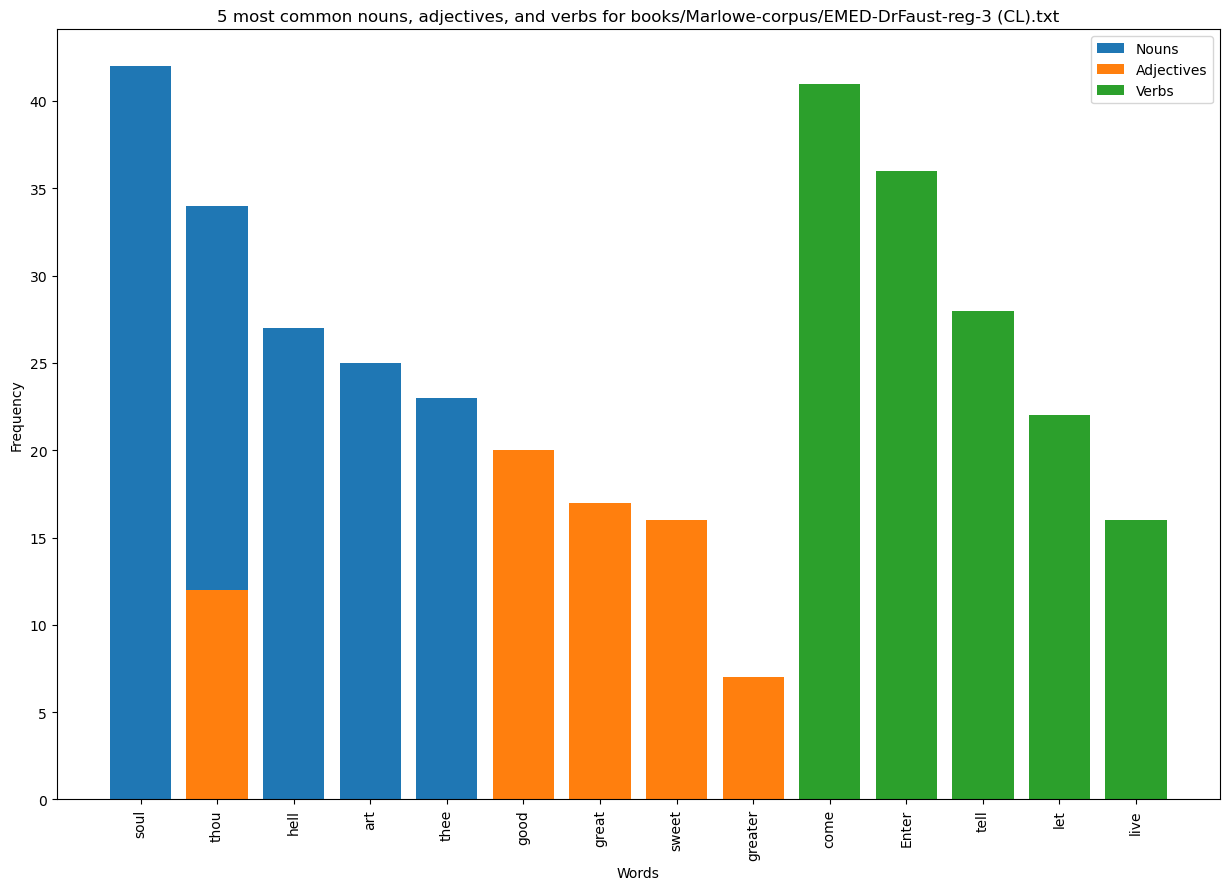

5 most common nouns, adjectives, and verbs for books/Marlowe-corpus/EMED-2Tam-reg-3 (CL).txt


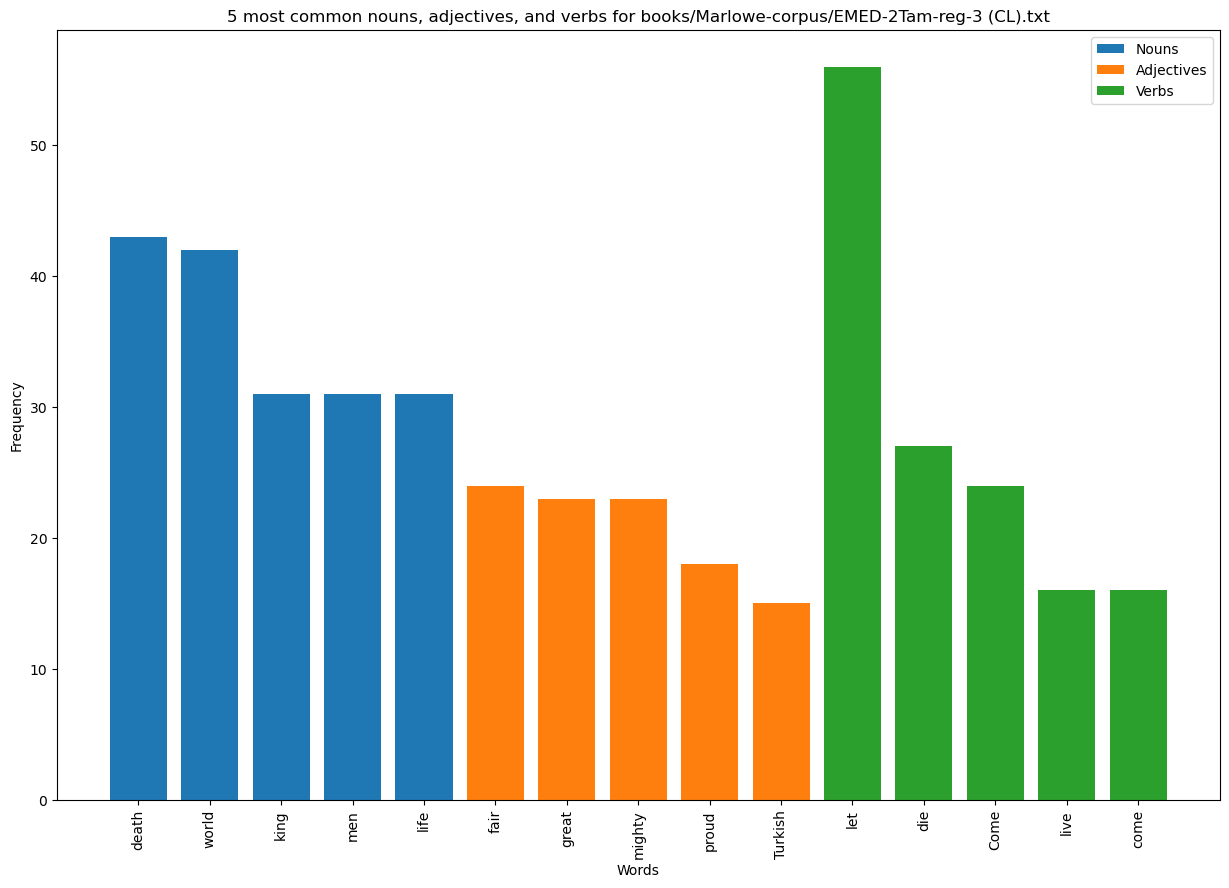

5 most common nouns, adjectives, and verbs for books/Marlowe-corpus/EMED-1Tam-reg-3 (CL).txt


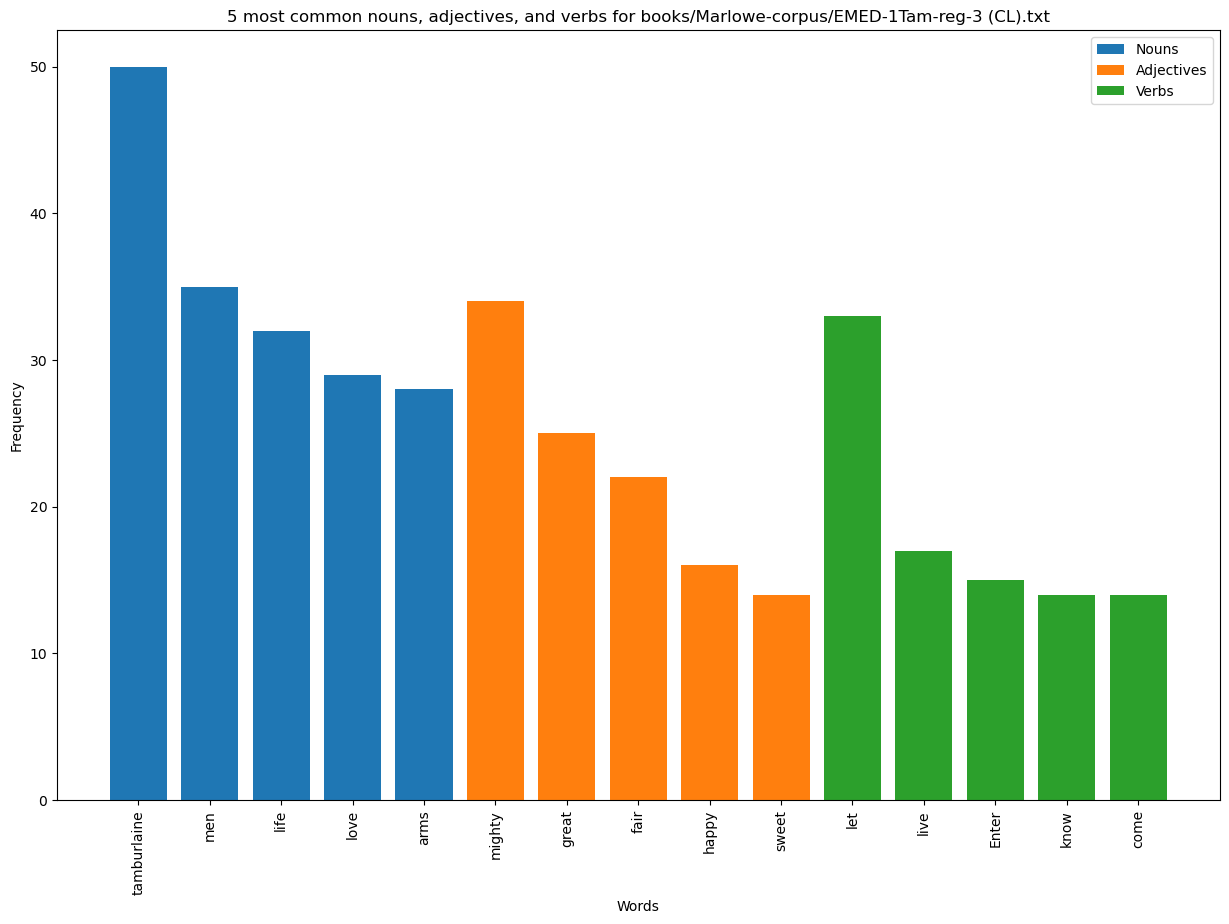

5 most common nouns, adjectives, and verbs for books/Marlowe-corpus/2HVI-MIT (CL).txt


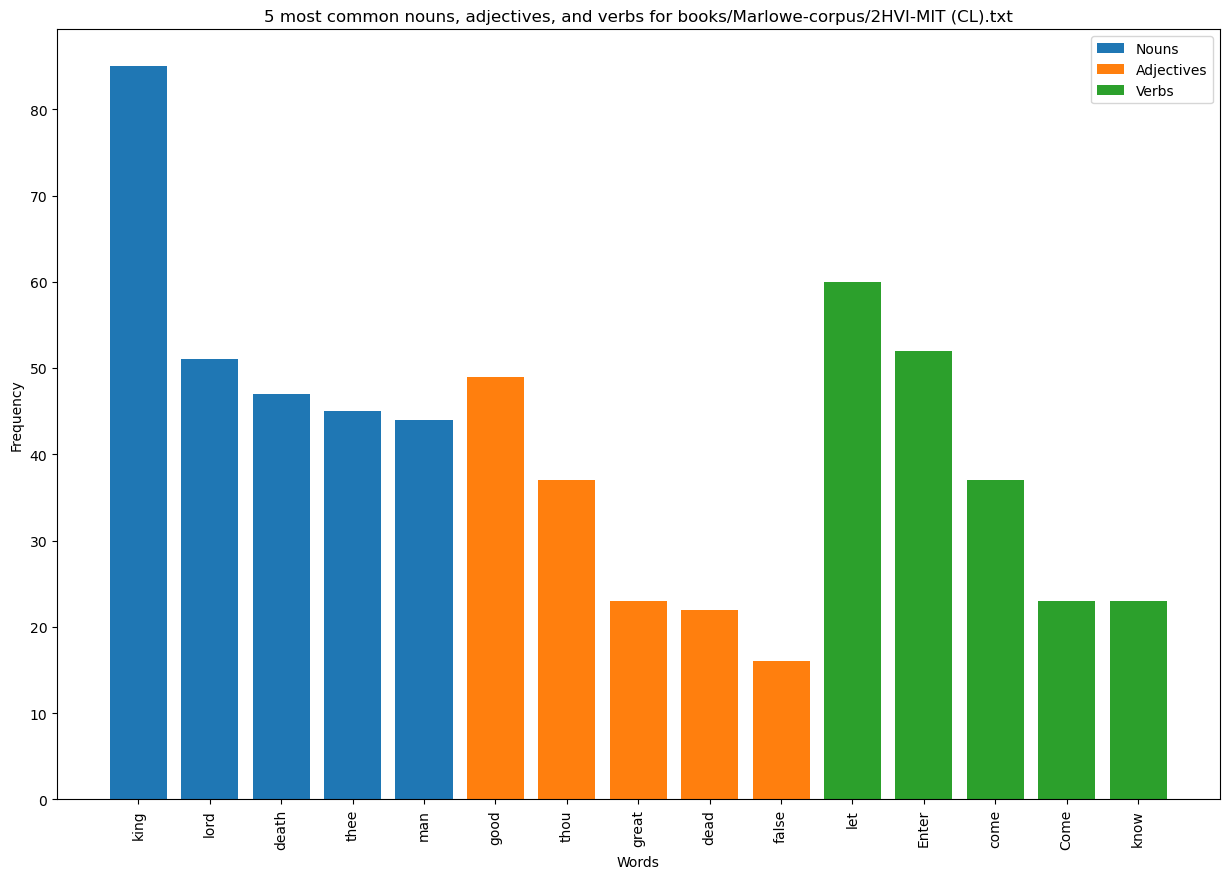

5 most common nouns, adjectives, and verbs for books/Marlowe-corpus/EMED-Ed2-reg-3(CL).txt


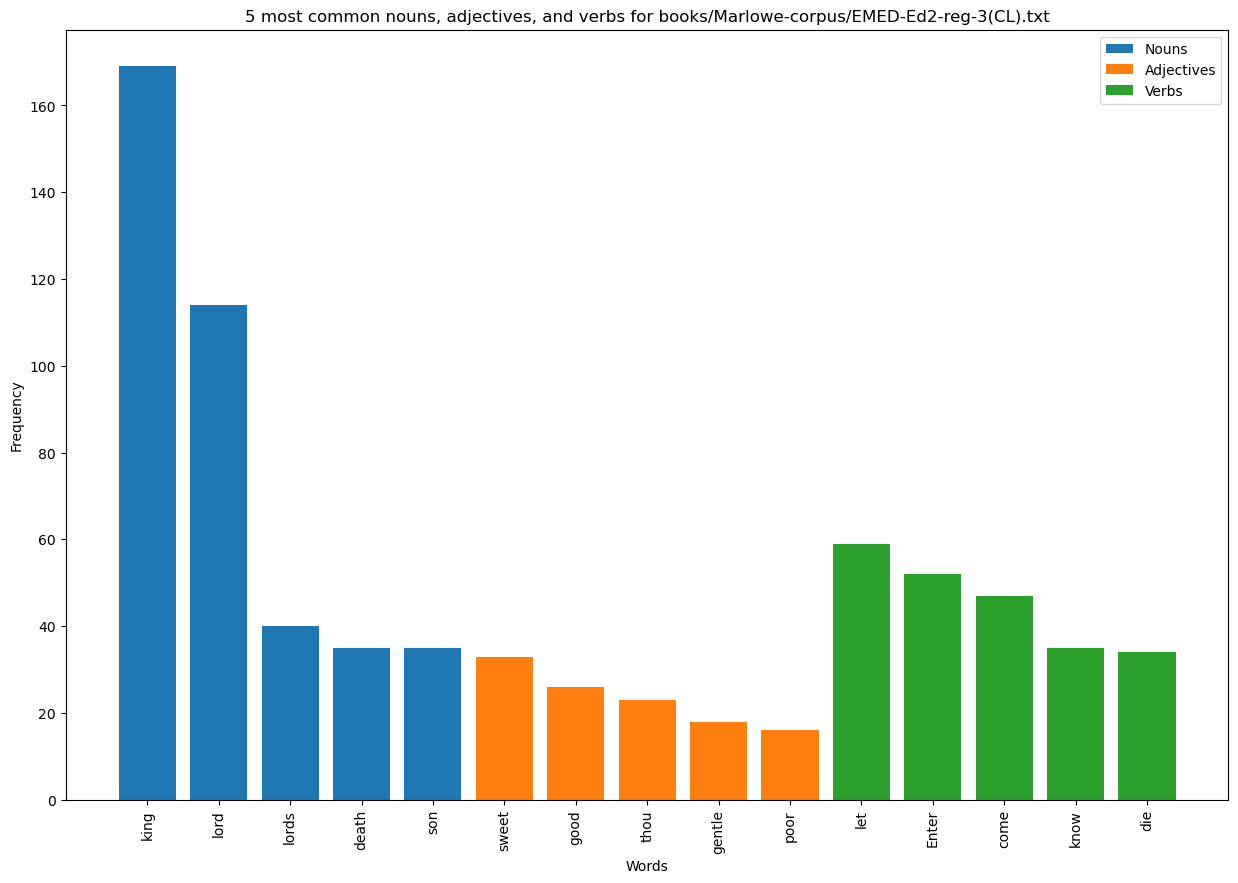

5 most common nouns, adjectives, and verbs for books/Marlowe-corpus/EMED-MP-reg-3(CL).txt


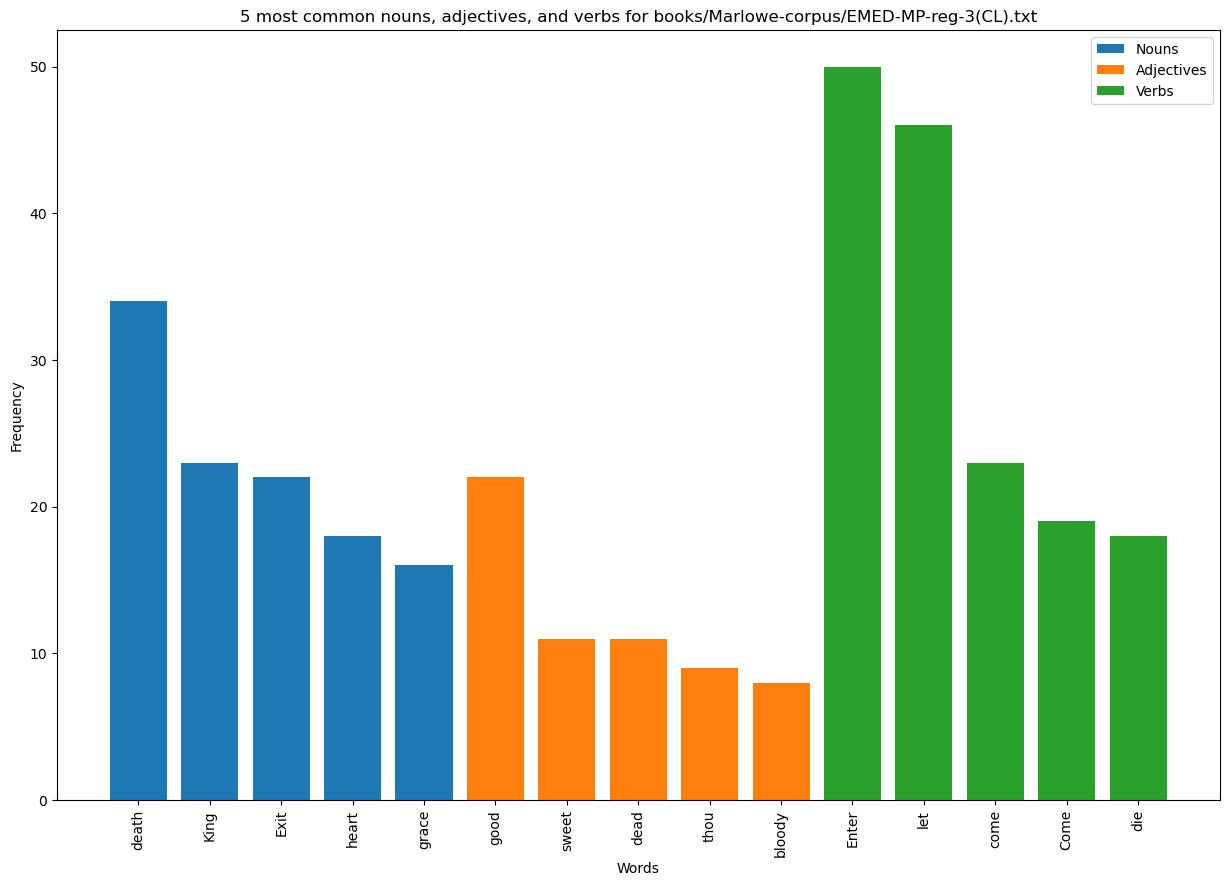

5 most common nouns, adjectives, and verbs for books/Marlowe-corpus/EMED-Dido-reg-3 (CL).txt


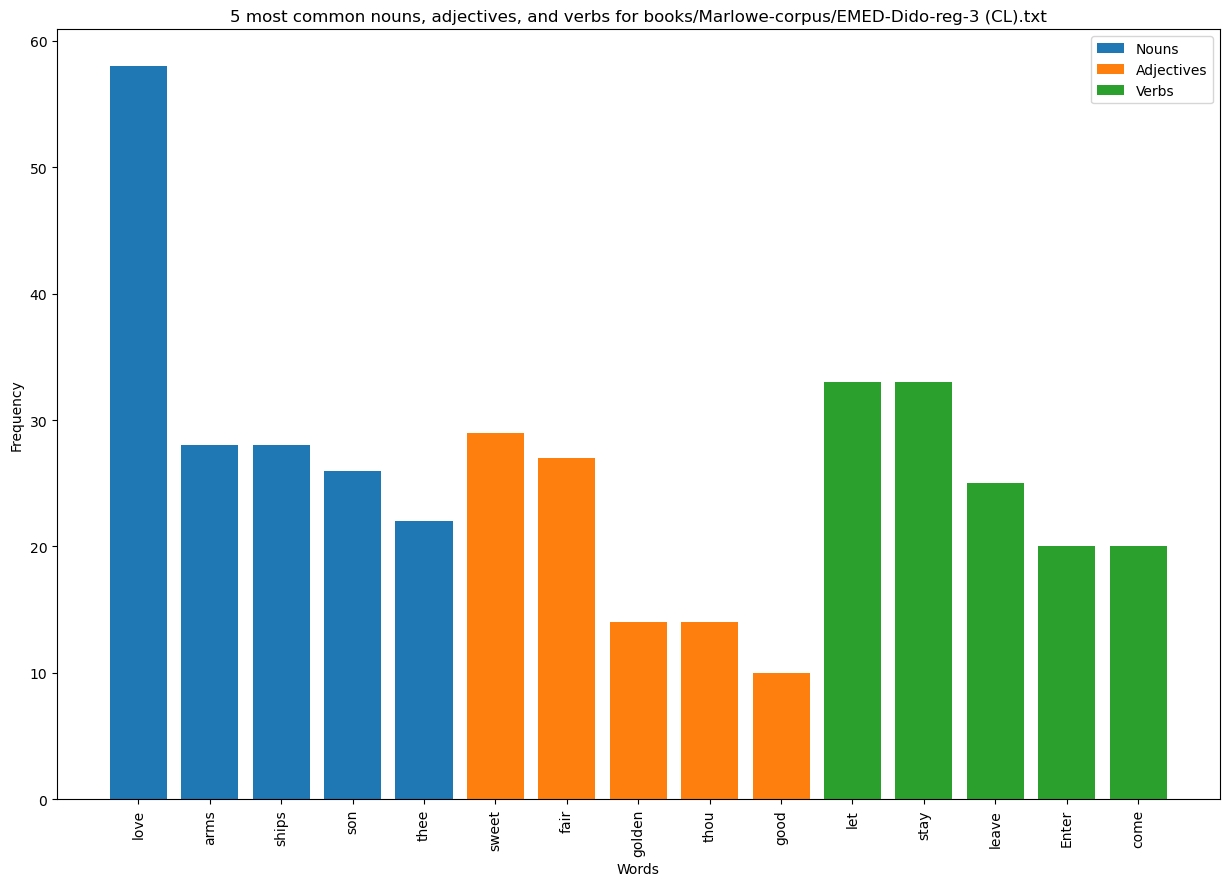

5 most common nouns, adjectives, and verbs for books/Marlowe-corpus/1HVI-MIT (CL).txt


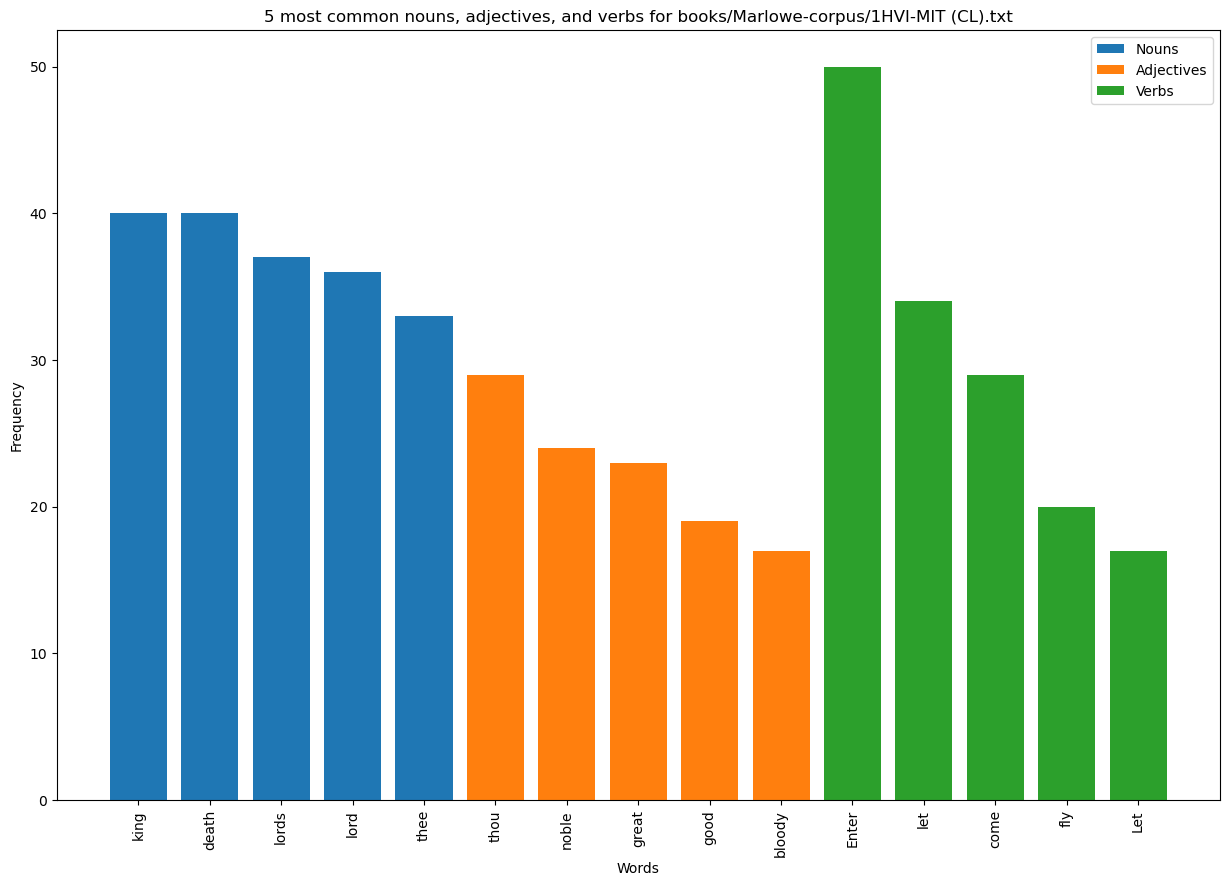

5 most common nouns, adjectives, and verbs for books/Marlowe-corpus/EMED-JoM-reg-3 (CL).txt


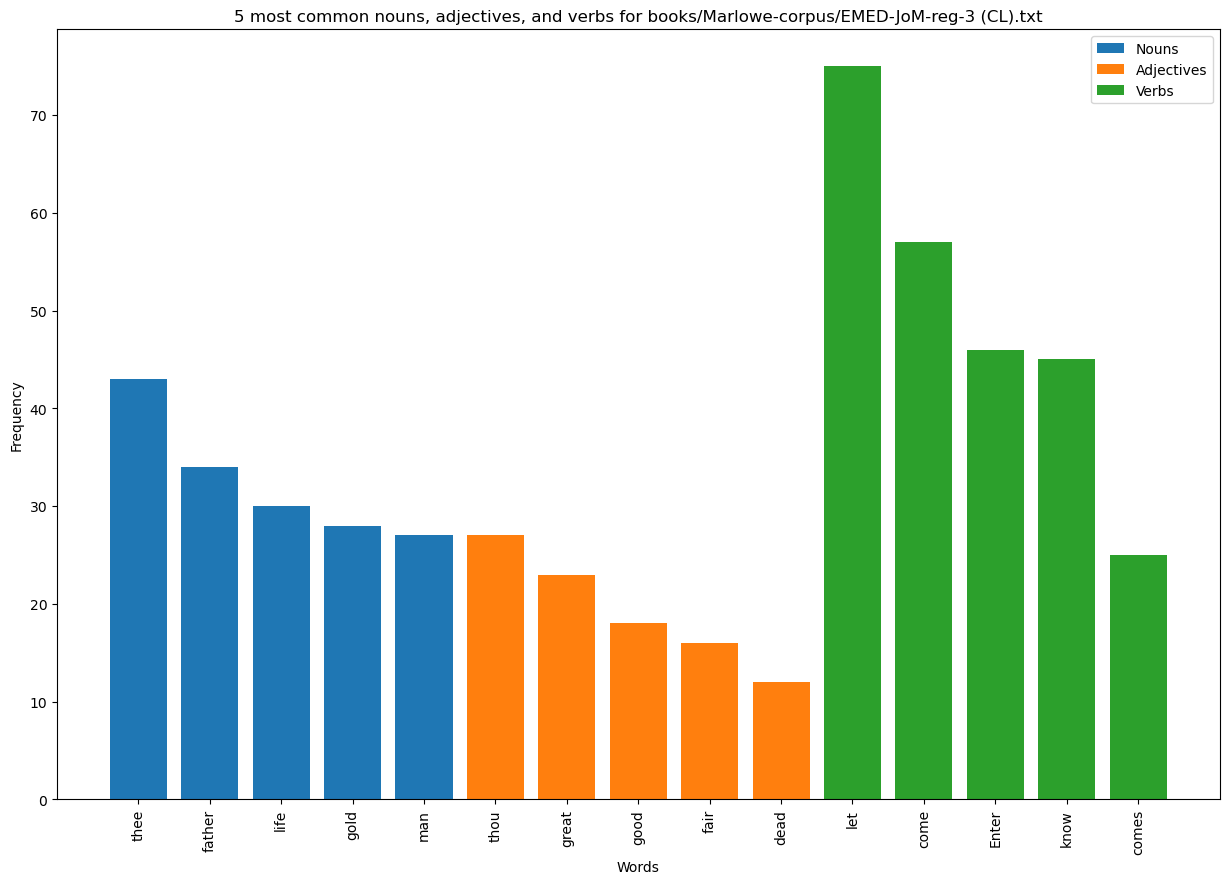

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/1H6: Henry VI, Part 1.txt


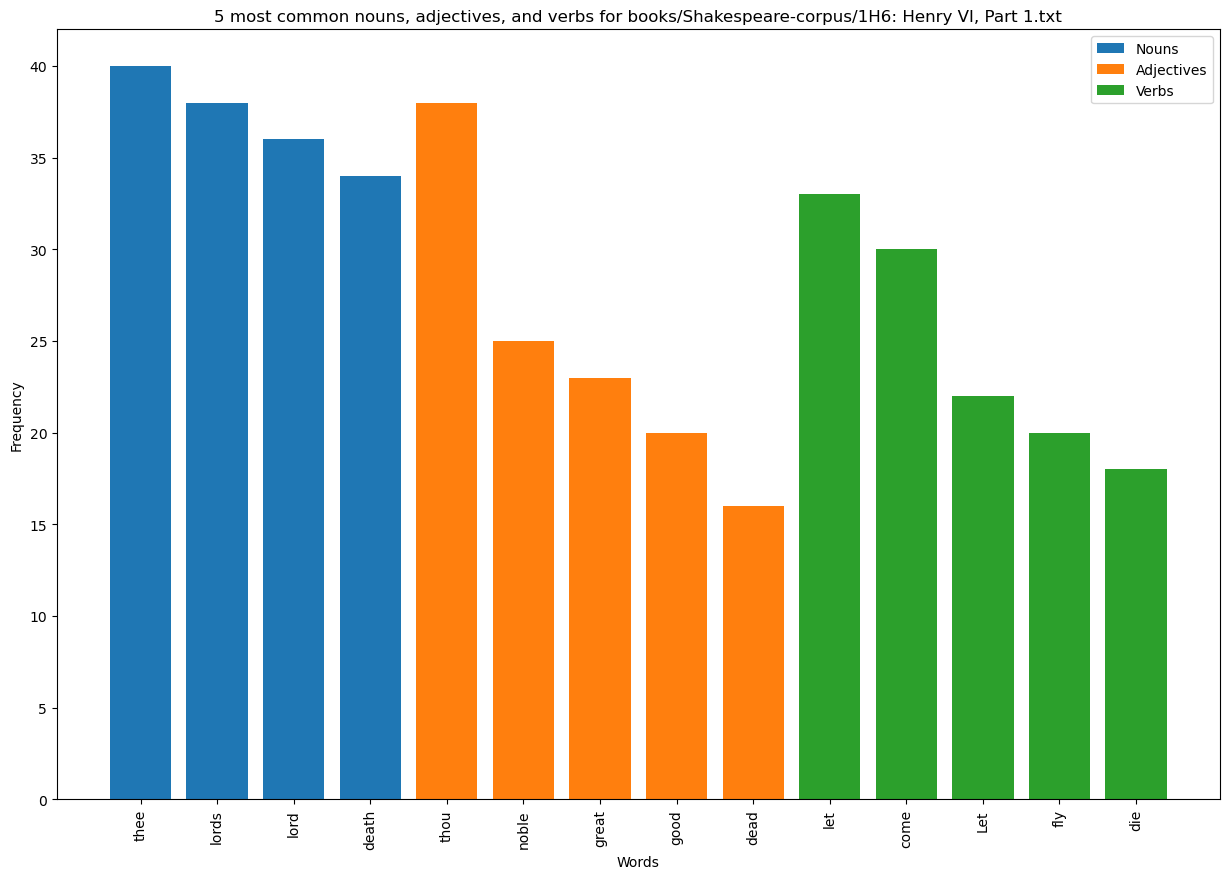

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/Ham: Hamlet.txt


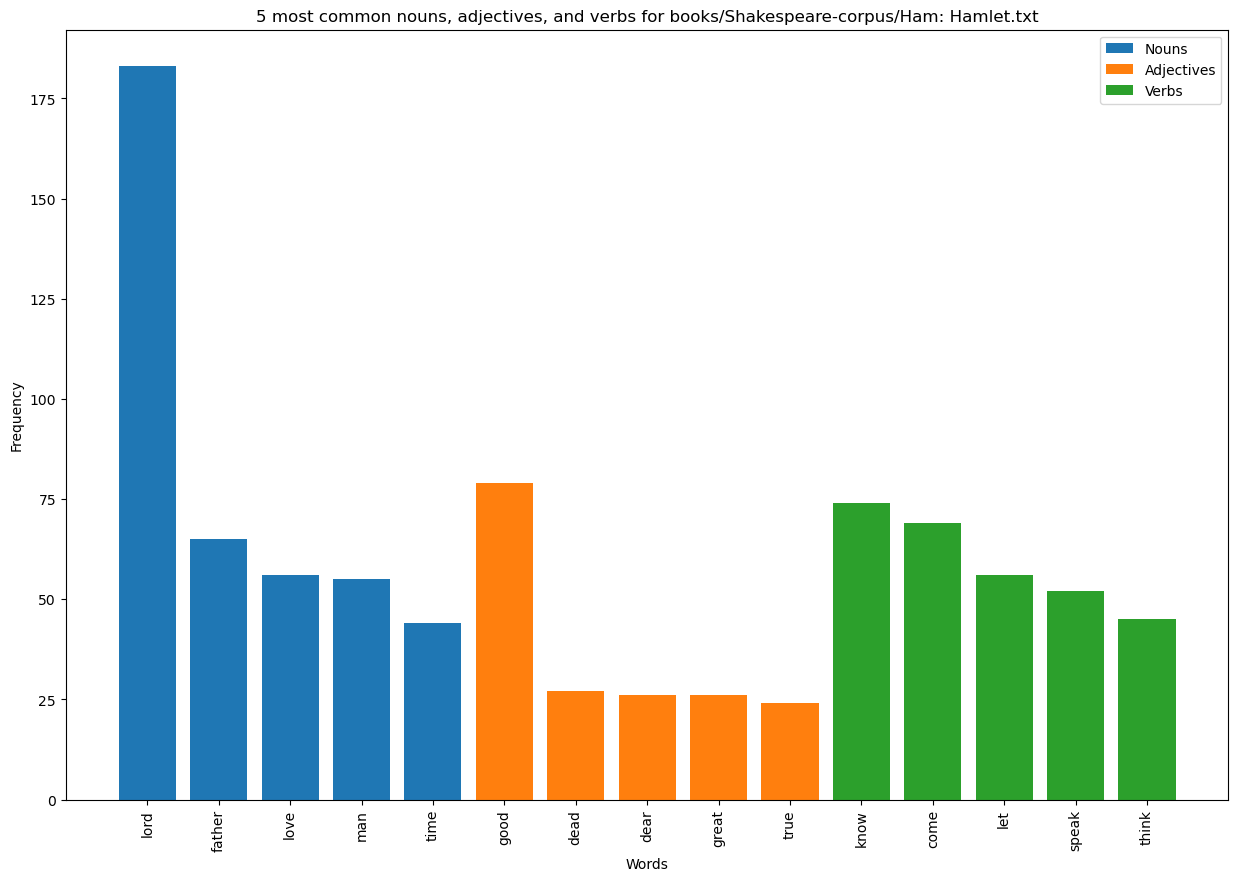

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/TNK: Two Noble Kinsmen.txt


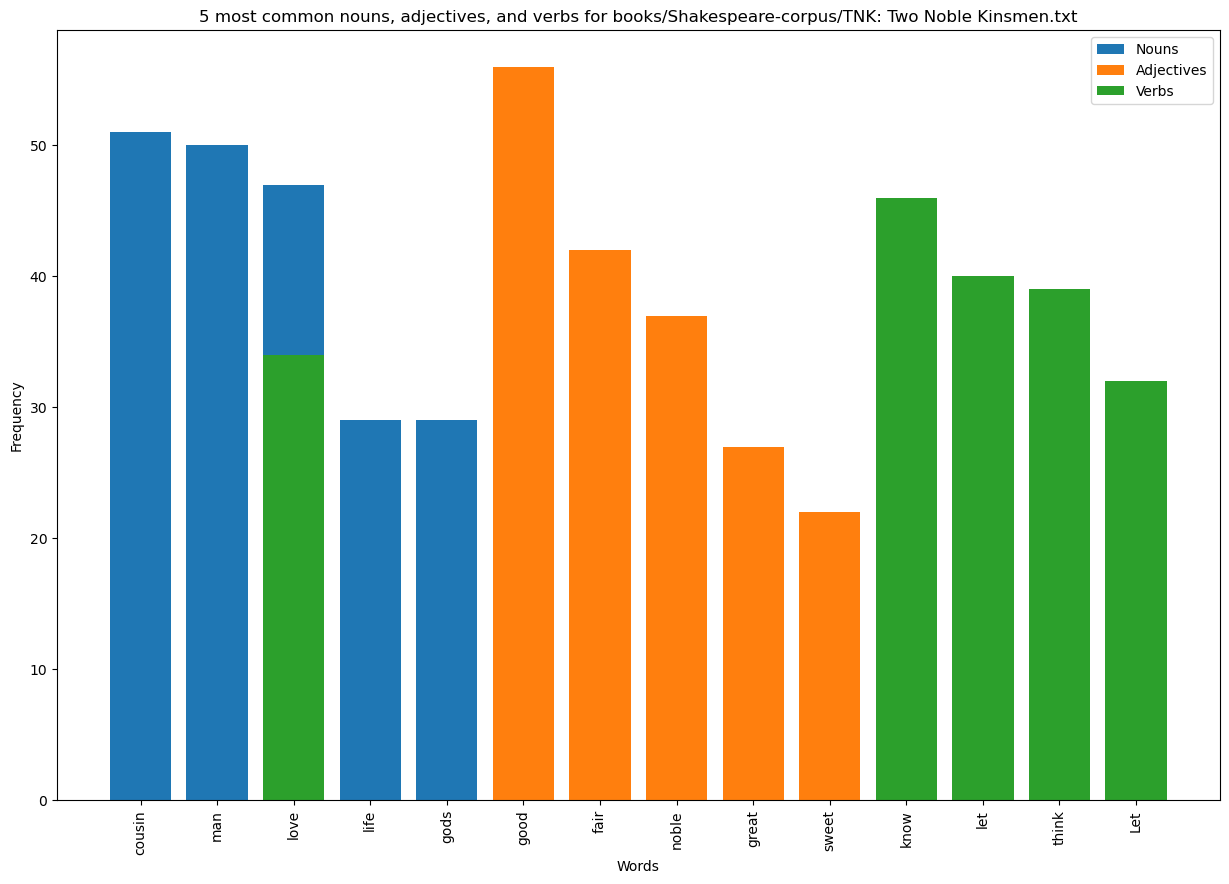

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/Tim: Timon of Athens.txt


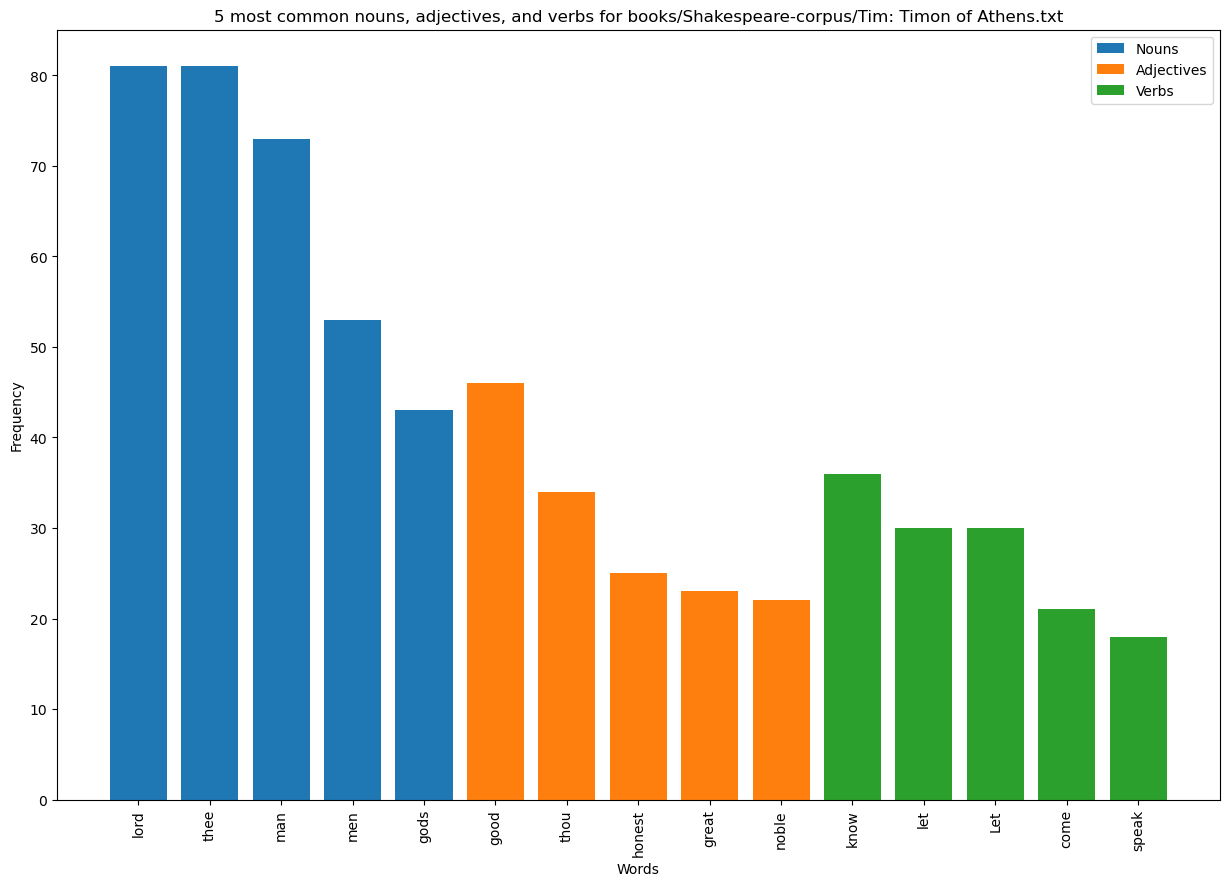

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/WT: The Winter's Tale.txt


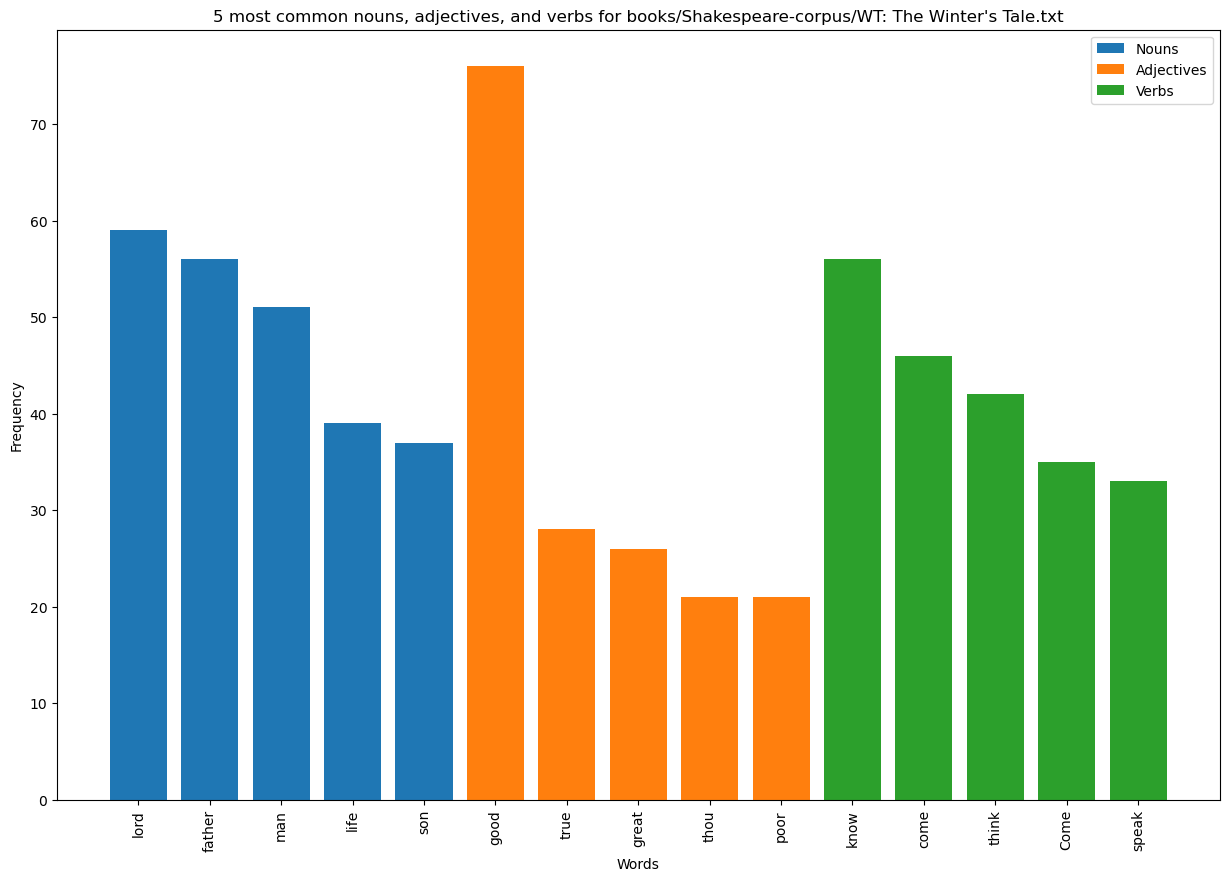

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/Wiv: The Merry Wives of Windsor.txt


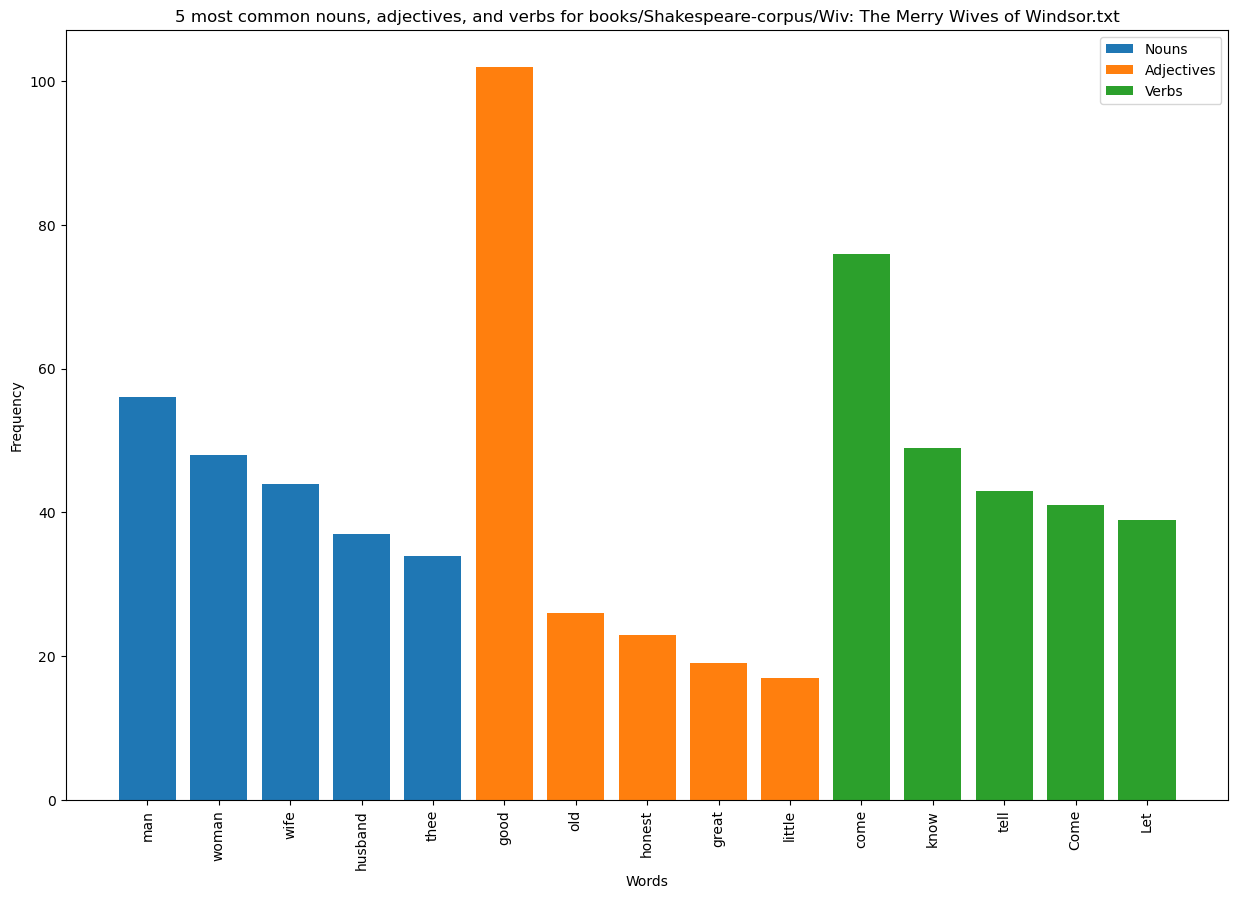

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/Jn: King John.txt


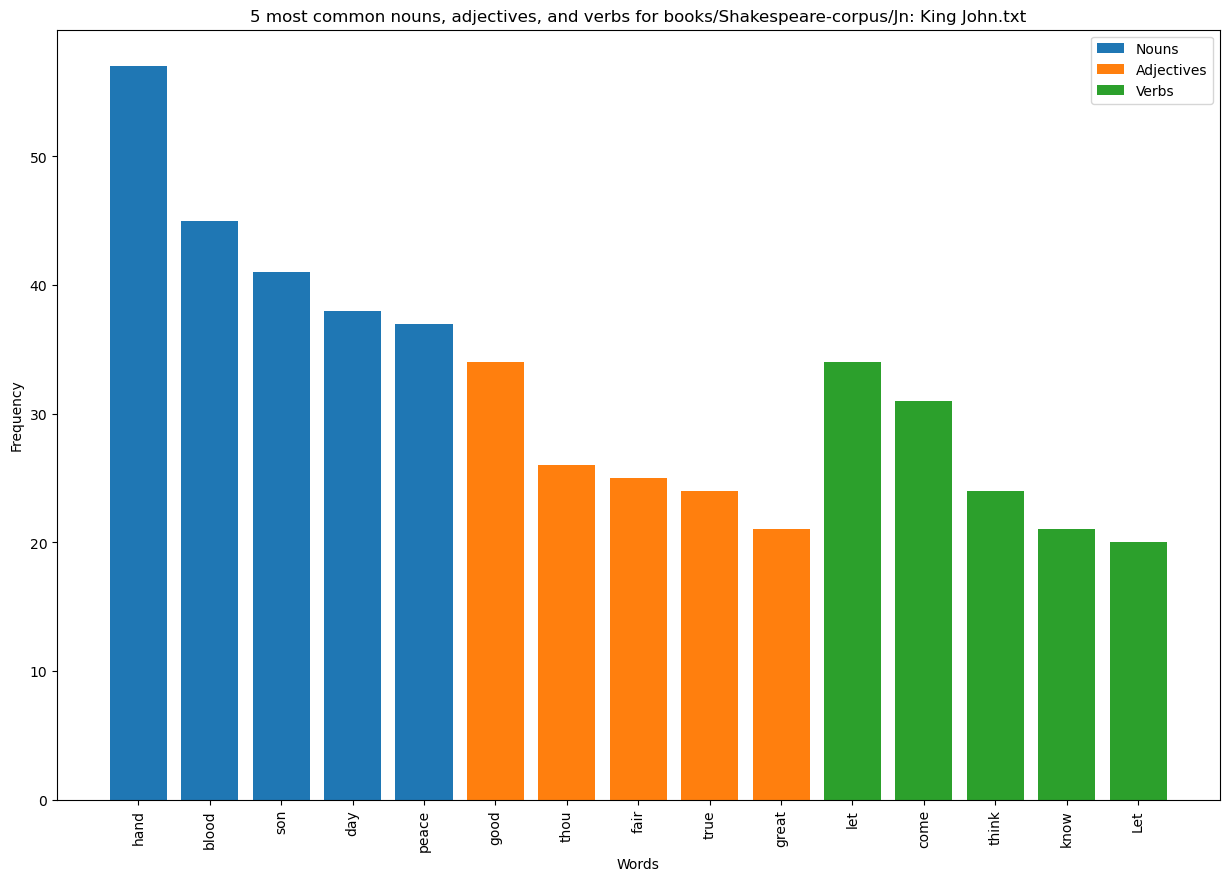

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/1H4: Henry IV, Part 1.txt


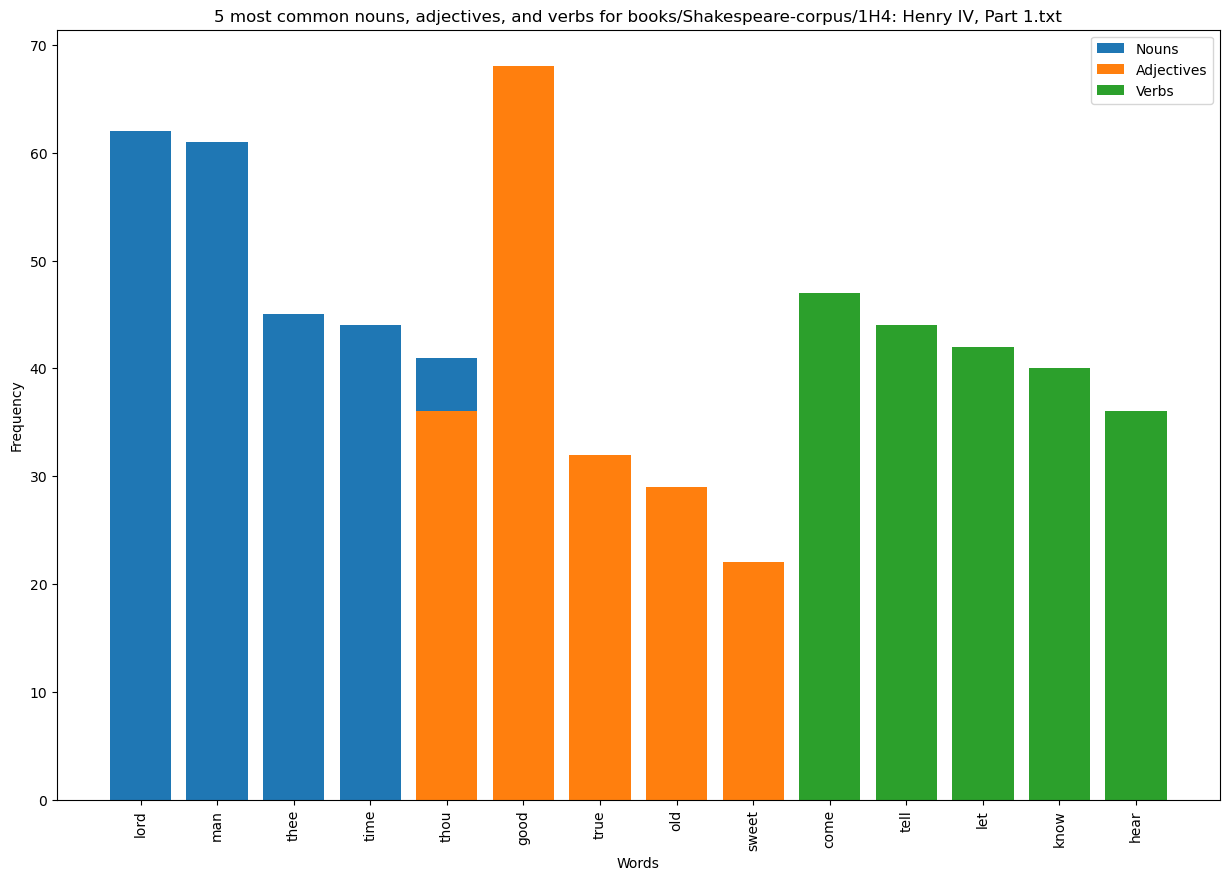

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/H8: Henry VIII.txt


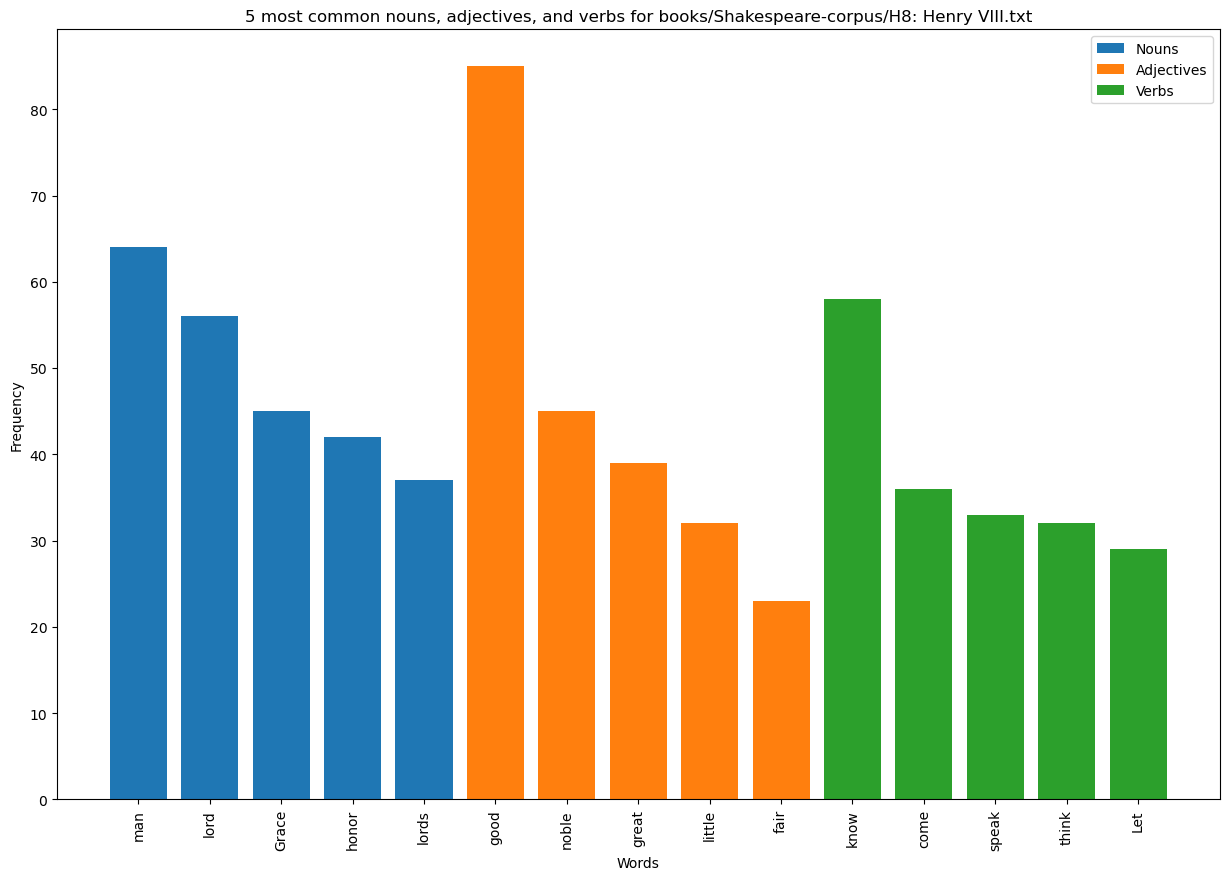

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/Tmp: The Tempest.txt


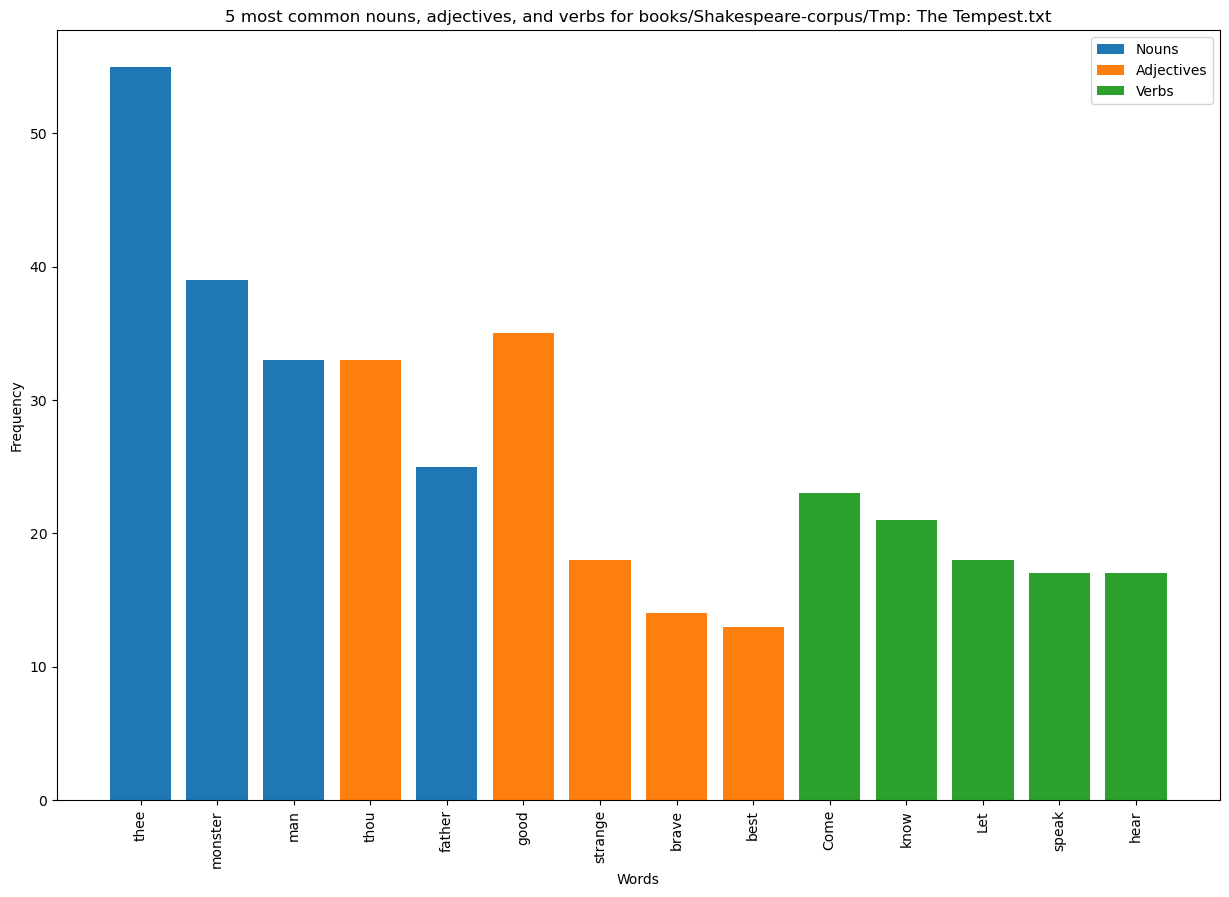

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/Ado: Much Ado About Nothing.txt


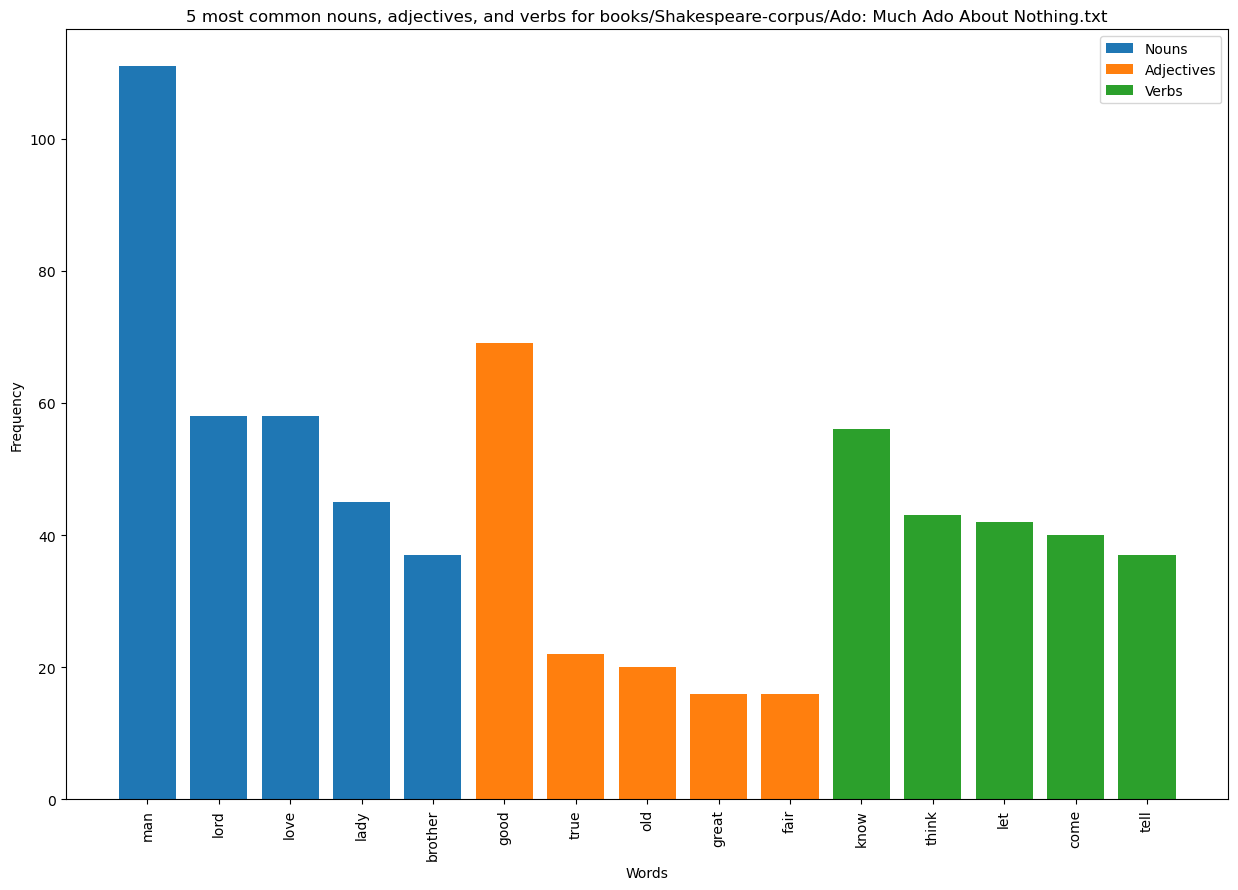

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/Rom: Romeo and Juliet.txt


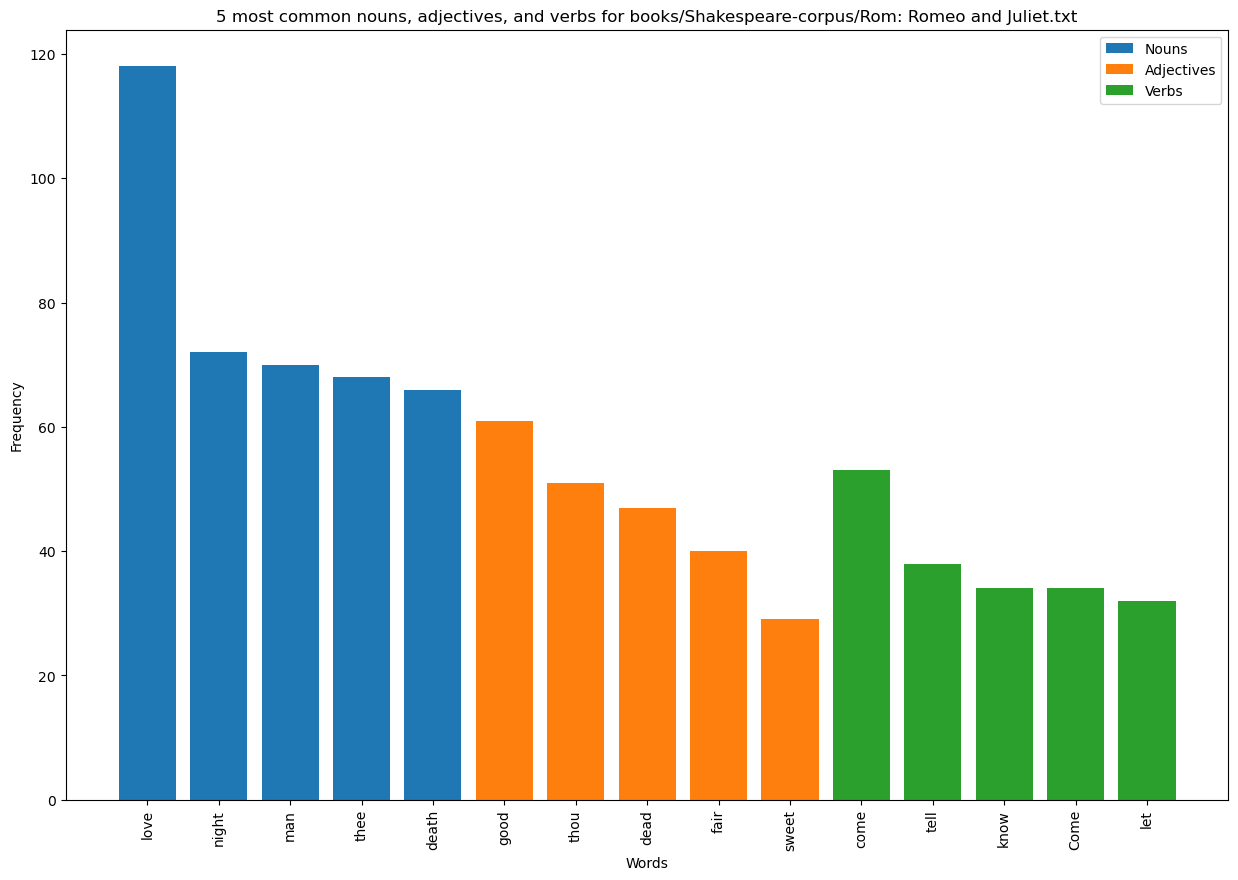

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/Tit: Titus Andronicus.txt


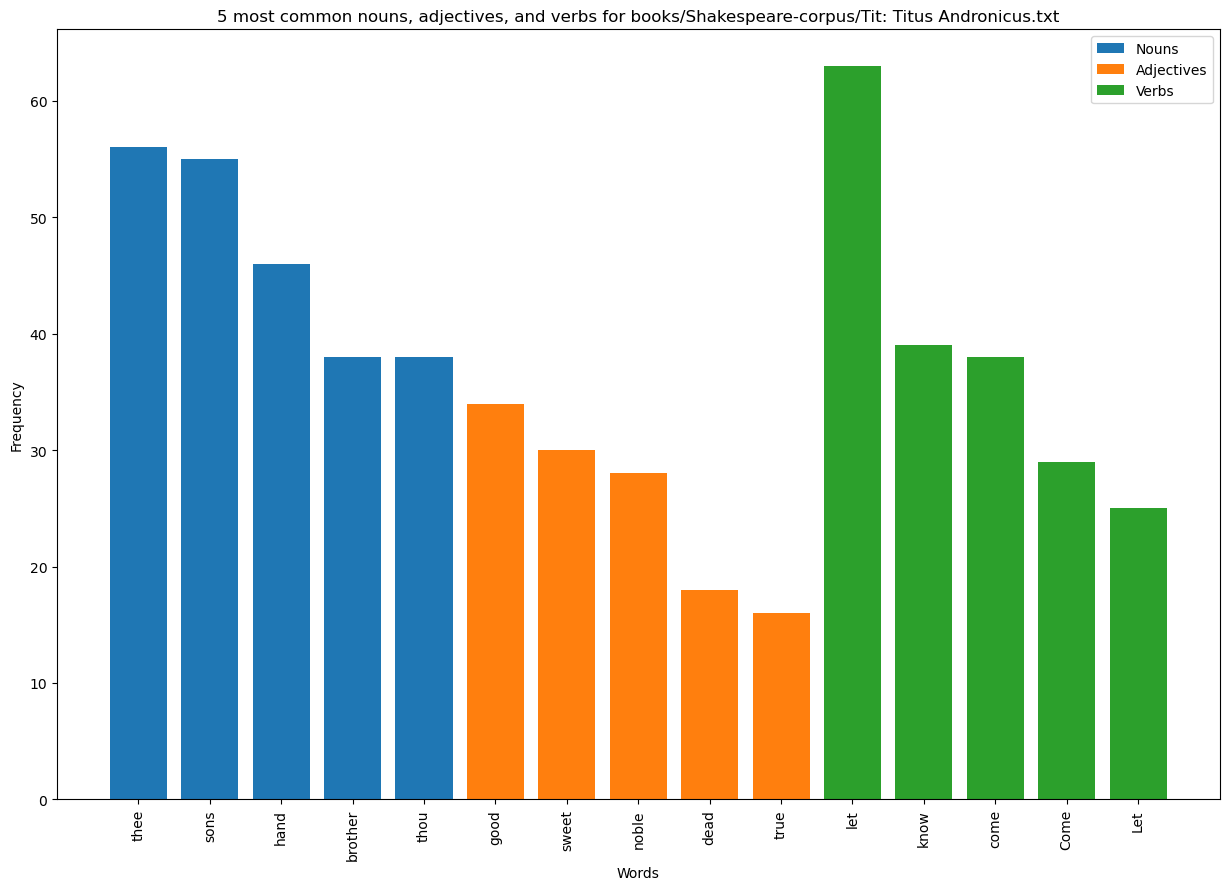

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/R2: Richard II.txt


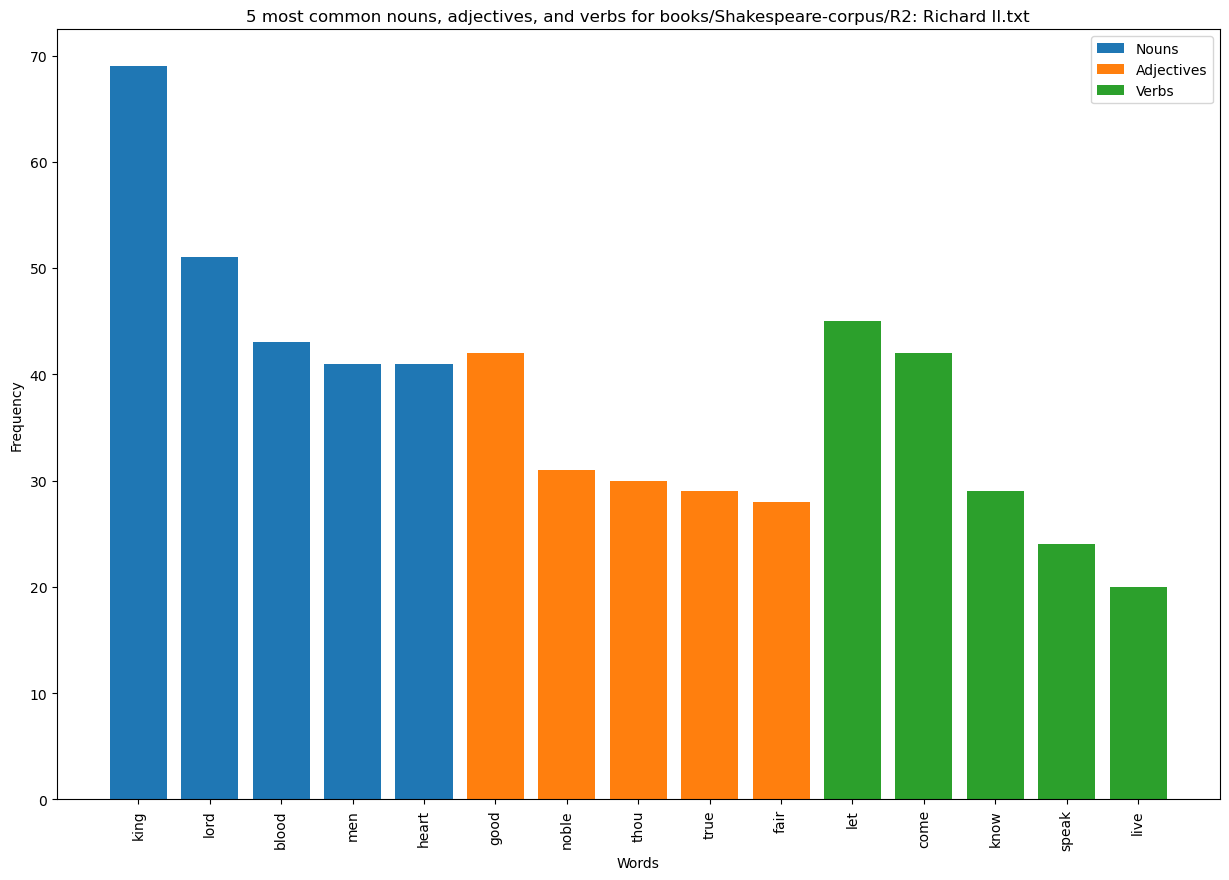

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/Mac: Macbeth.txt


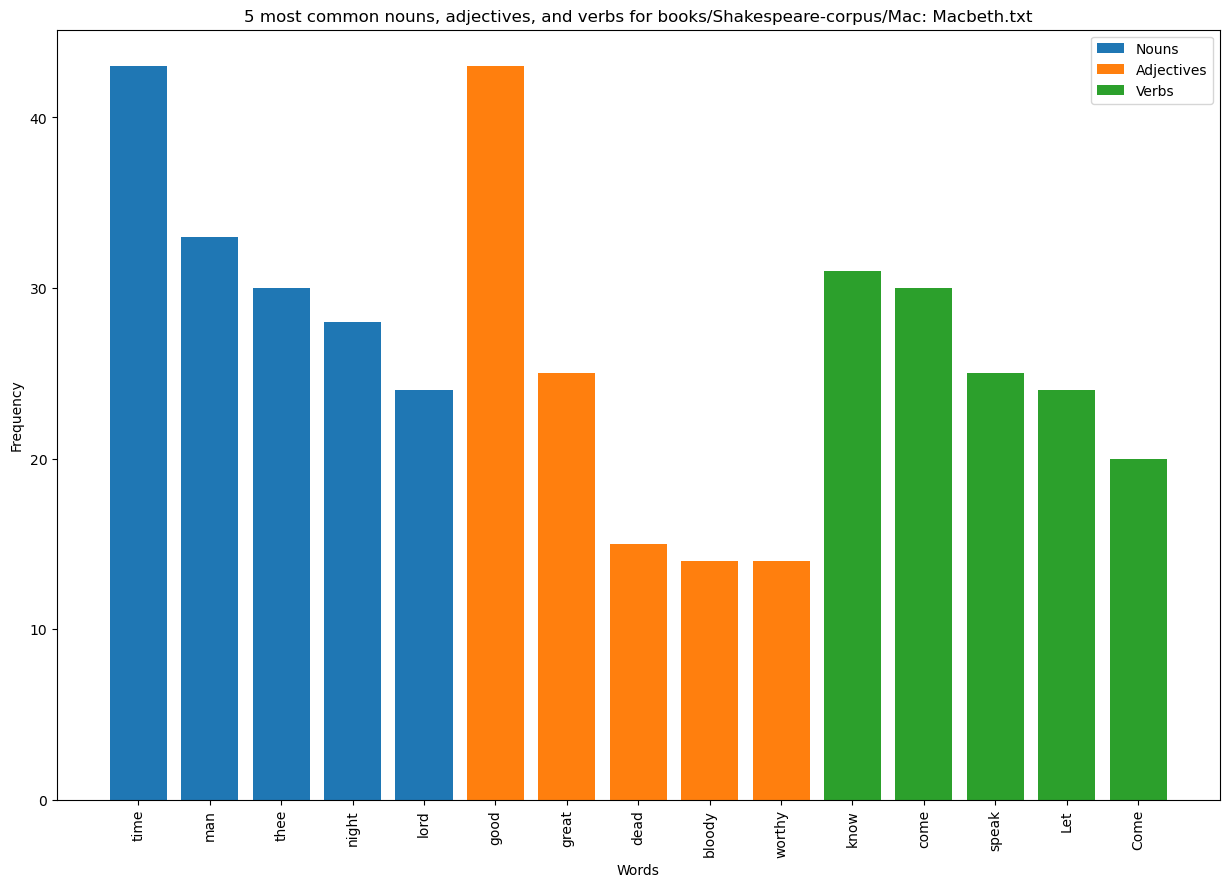

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/2H4: Henry IV, Part 2.txt


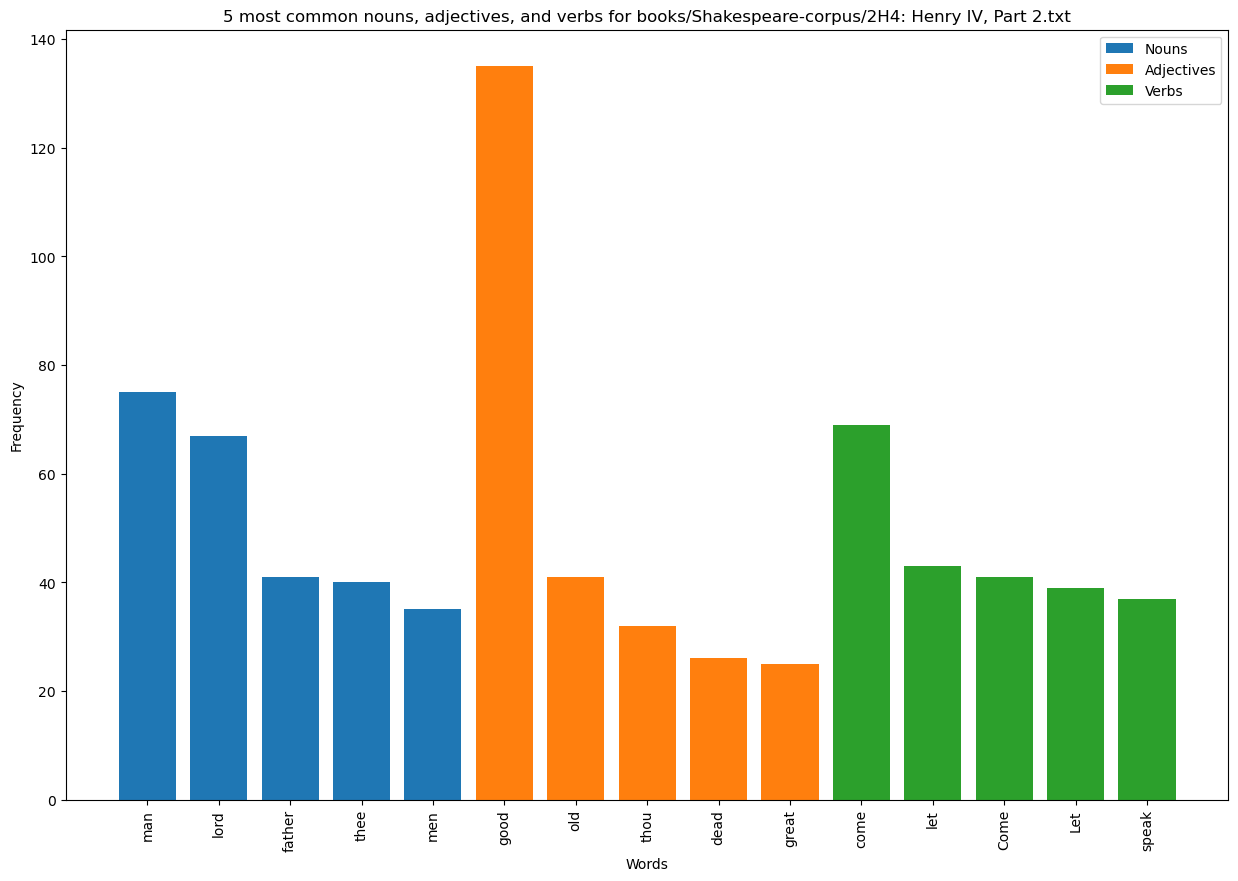

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/Err: The Comedy of Errors.txt


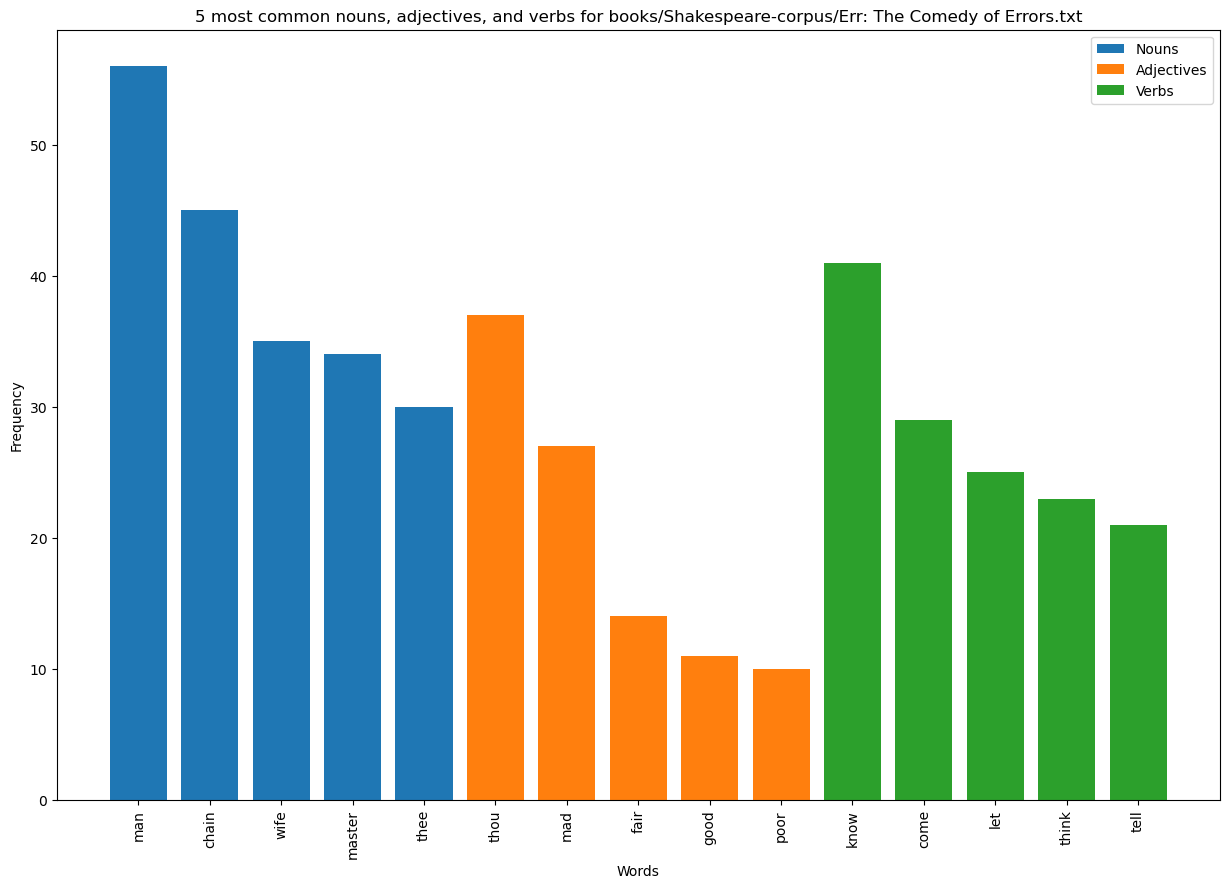

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/AWW: All's Well That Ends Well.txt


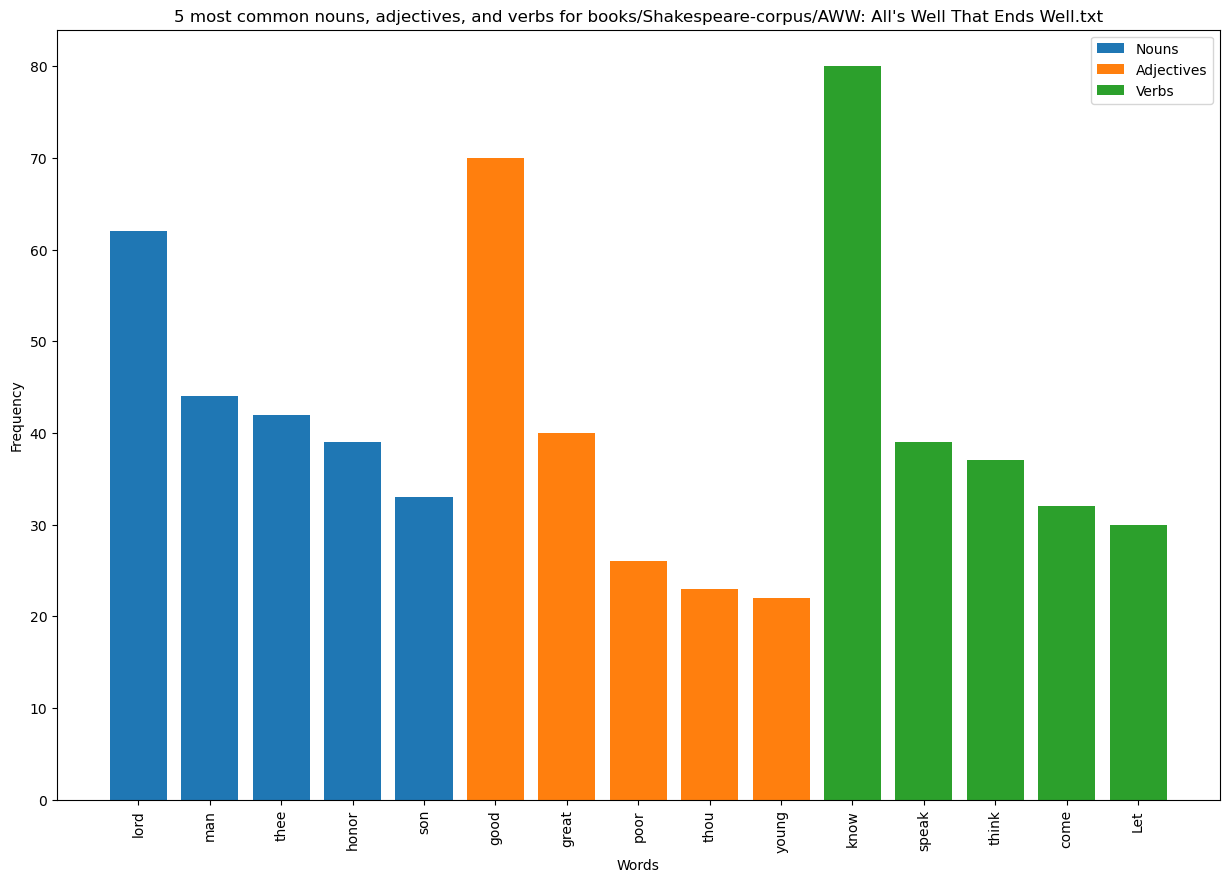

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/MV: The Merchant of Venice.txt


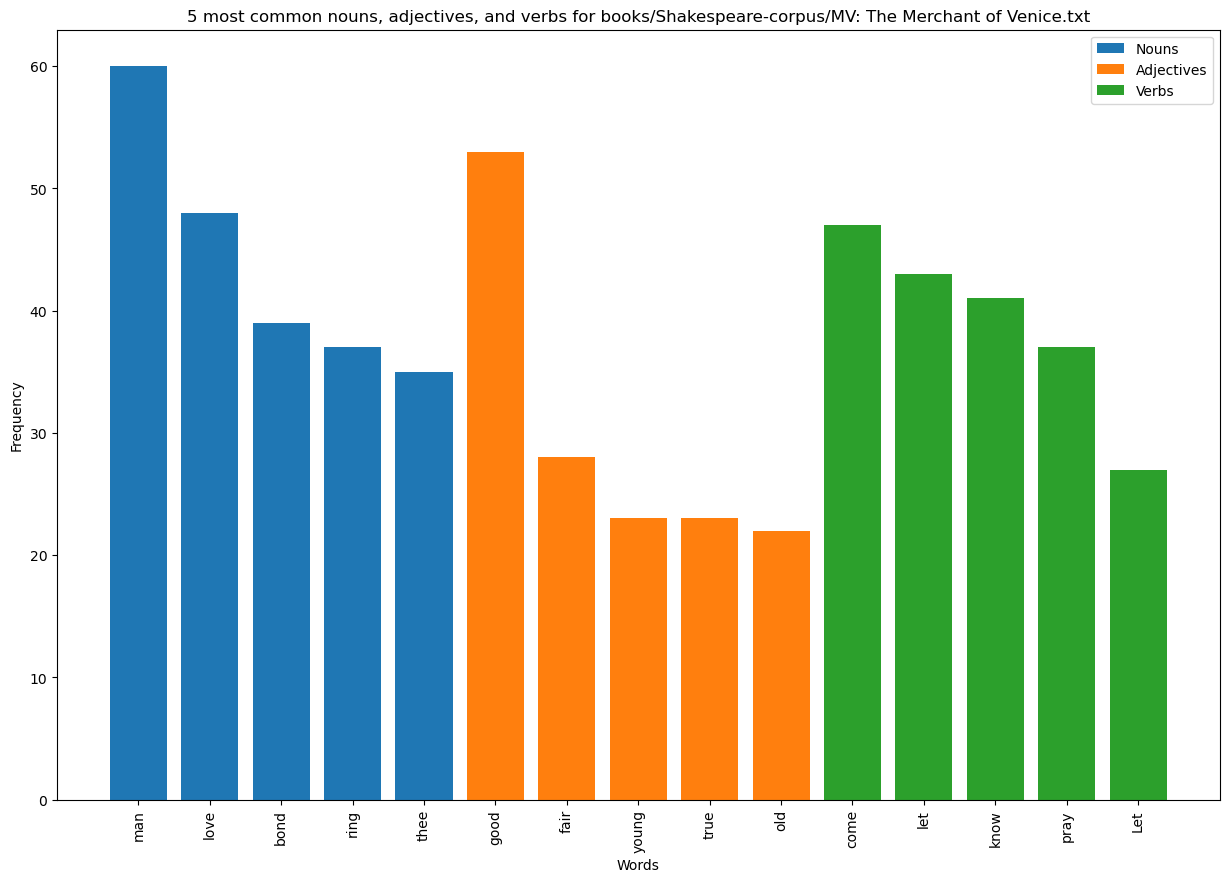

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/2H6: Henry VI, Part 2.txt


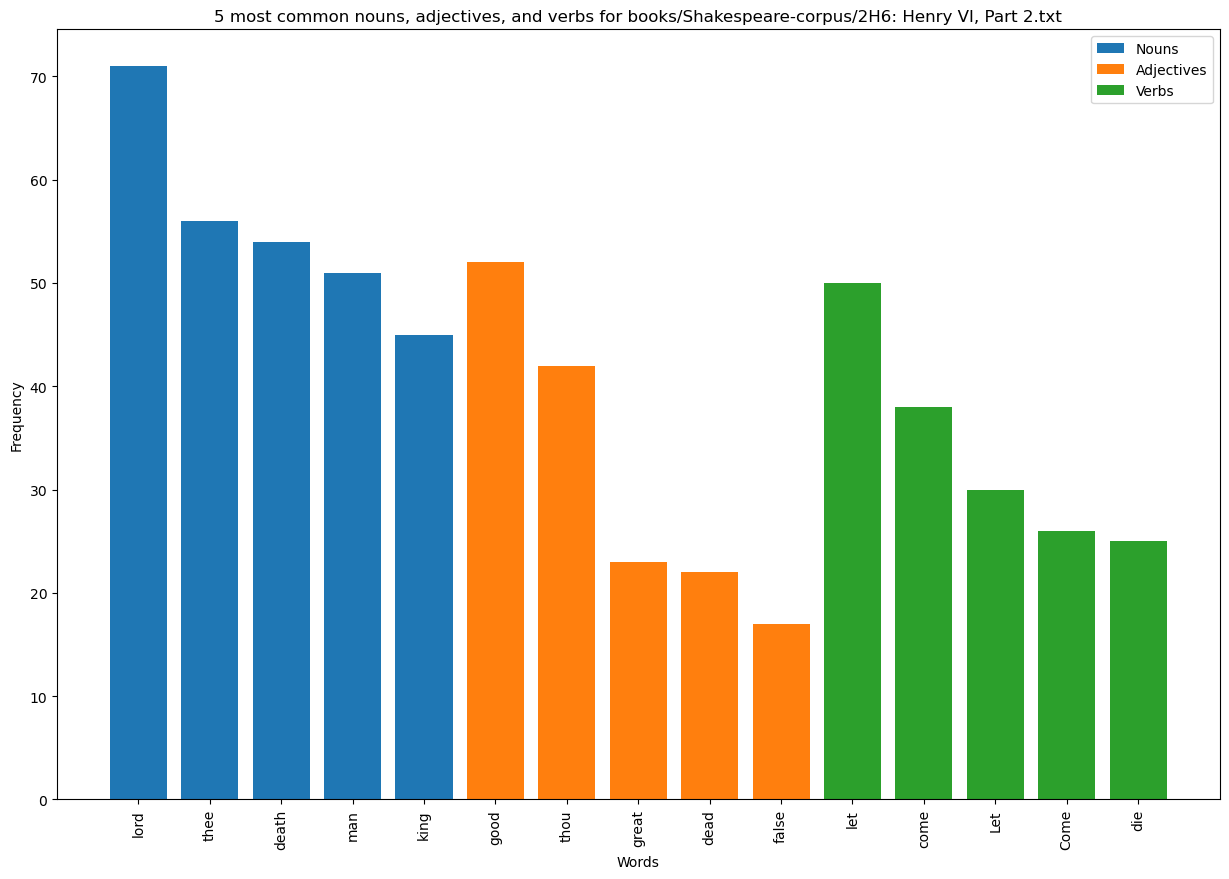

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/Cor: Coriolanus.txt


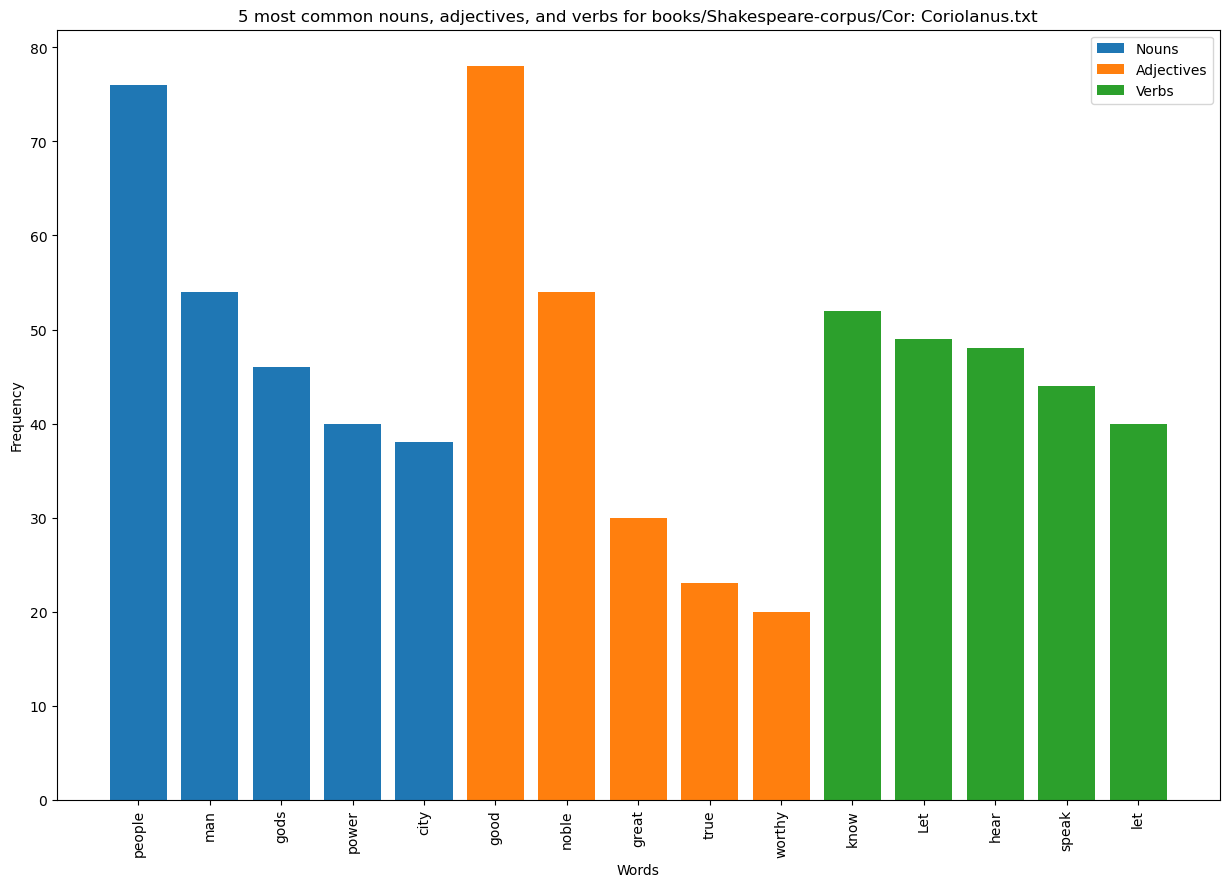

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/R3: Richard III.txt


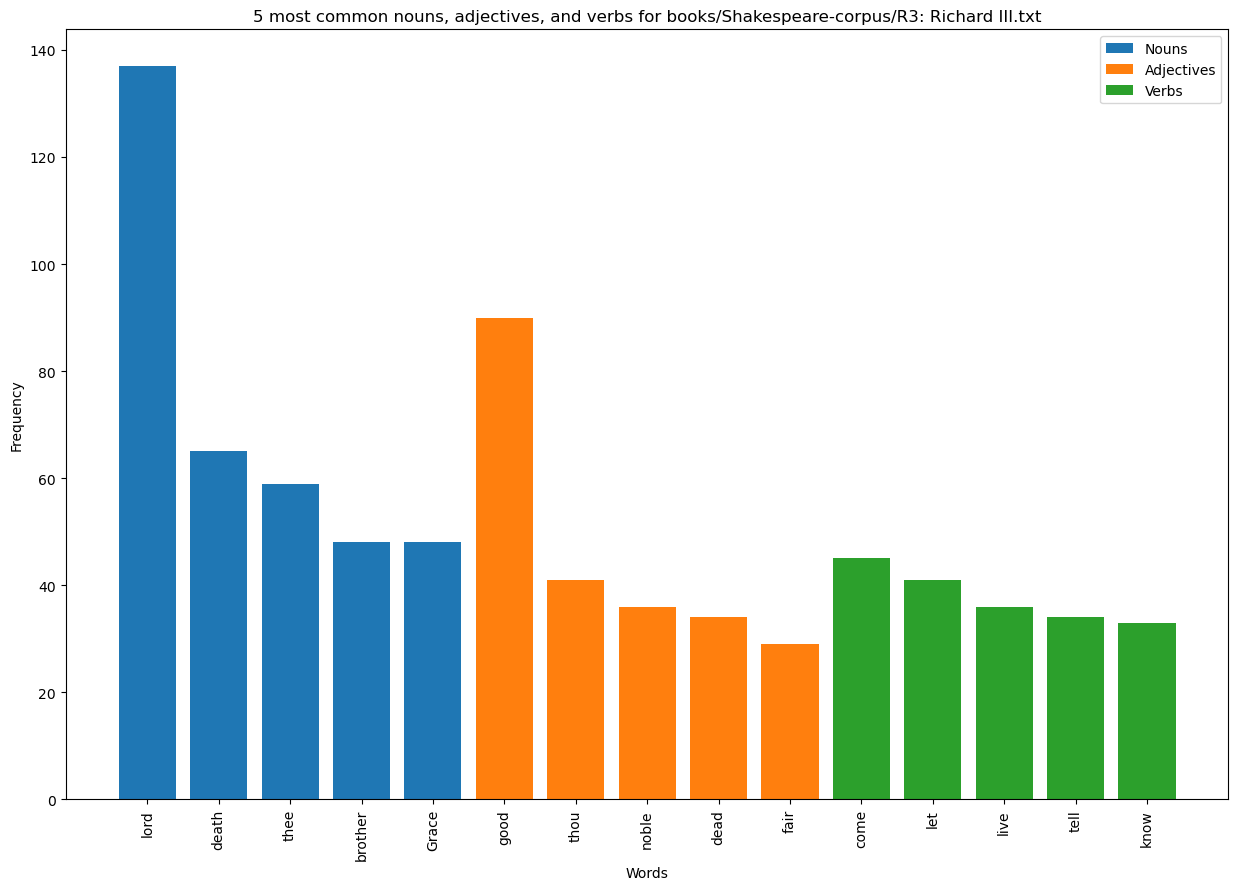

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/Lr: King Lear.txt


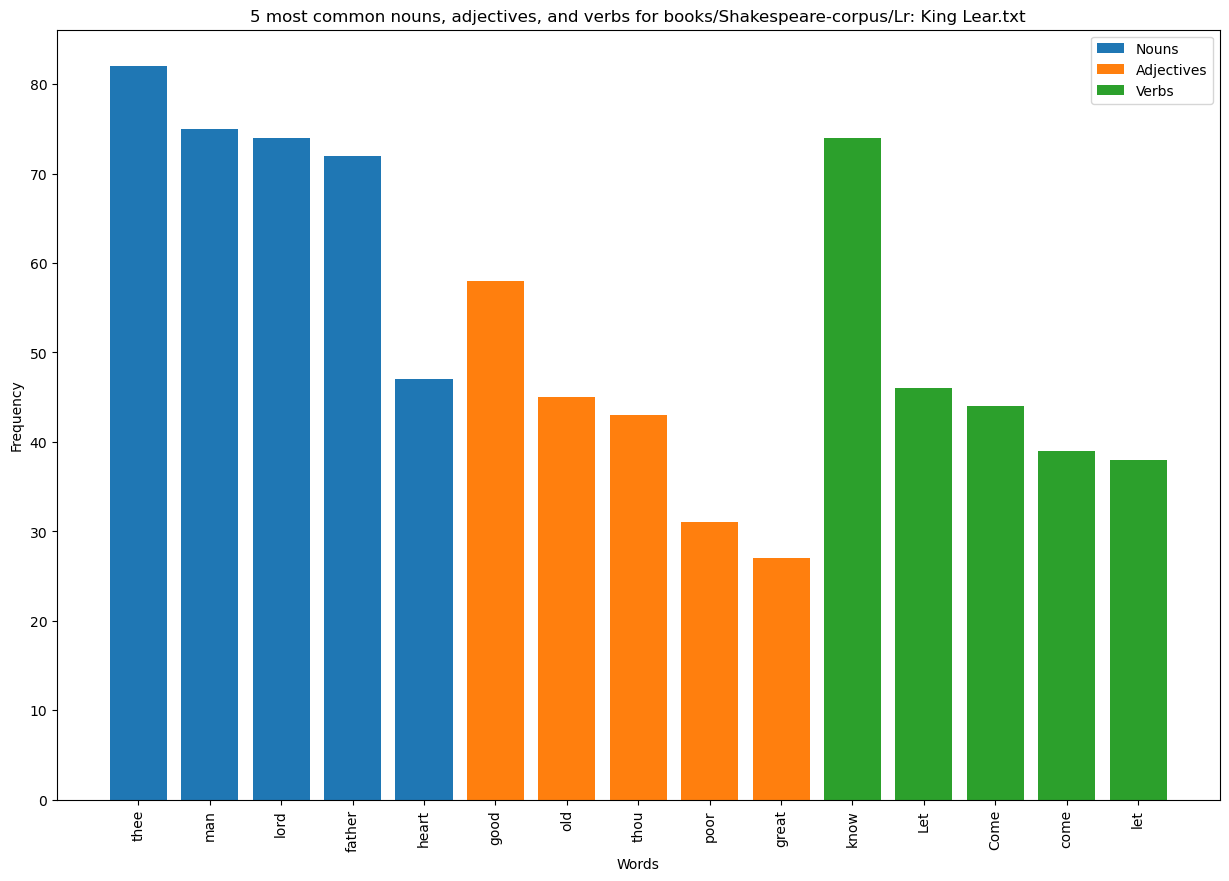

5 most common nouns, adjectives, and verbs for books/Shakespeare-corpus/AYL: As You Like It.txt


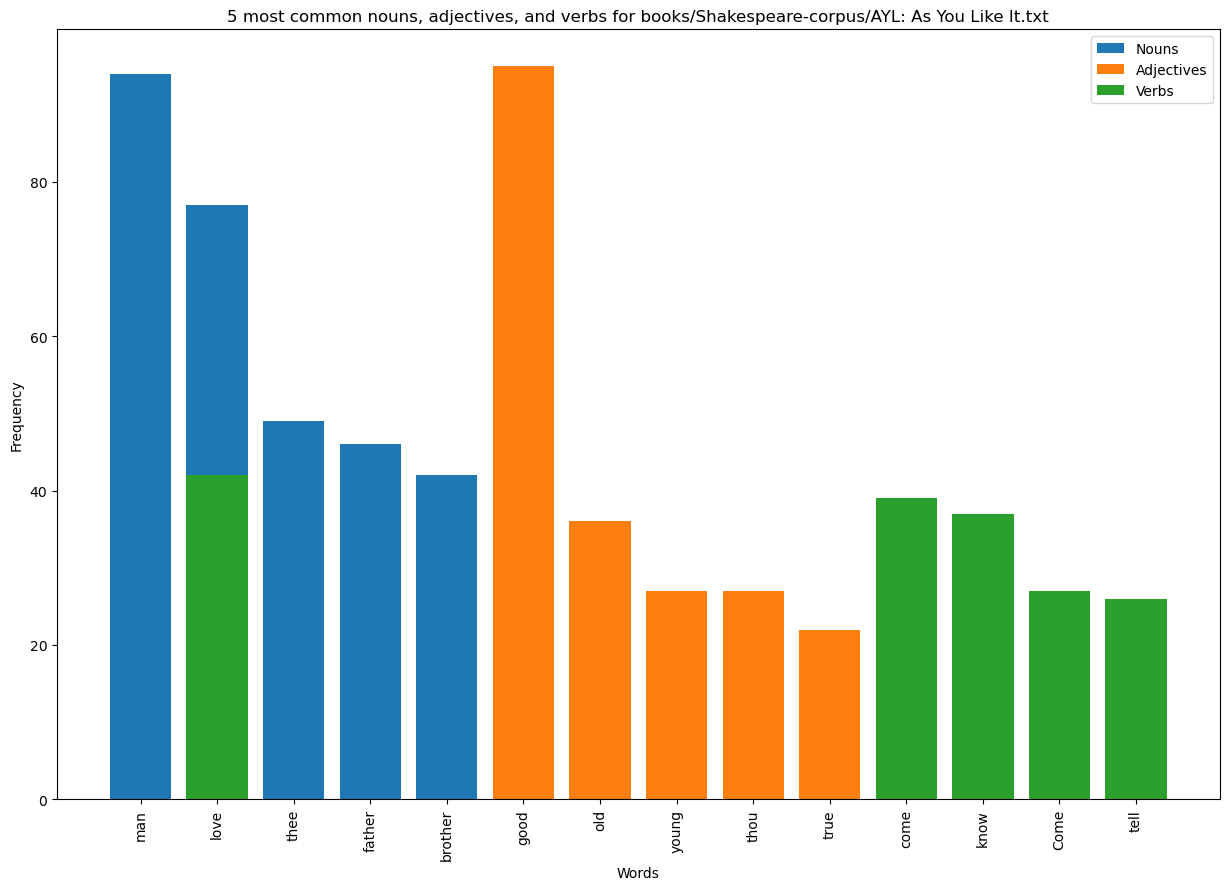

KeyboardInterrupt: 

In [17]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import glob
%matplotlib inline

nlp = spacy.load("en_core_web_md")

for file_path in glob.glob("books/**/*.txt", recursive=True):
    with open(file_path, "r") as file:
        text = file.read()

    doc = nlp(text)

    nouns = []
    adjectives = []
    verbs = []

    for token in doc:
        if token.pos_ == "NOUN" and not token.is_stop and not token.is_punct and token.lemma_.isalpha() and len(token.lemma_) > 2:
            nouns.append(token.text)
        elif token.pos_ == "ADJ" and not token.is_stop and not token.is_punct and token.lemma_.isalpha() and len(token.lemma_) > 2:
            adjectives.append(token.text)
        elif token.pos_ == "VERB" and not token.is_stop and not token.is_punct and token.lemma_.isalpha() and len(token.lemma_) > 2:
            verbs.append(token.text)

    nouns_frequency_distribution = Counter(nouns)
    adjectives_frequency_distribution = Counter(adjectives)
    verbs_frequency_distribution = Counter(verbs)

    nouns_most_common = nouns_frequency_distribution.most_common(count_of_words)
    adjectives_most_common = adjectives_frequency_distribution.most_common(count_of_words)
    verbs_most_common = verbs_frequency_distribution.most_common(count_of_words)

    nouns_30_words = []
    adjectives_30_words = []
    verbs_30_words = []
    nouns_30_freq = []
    adjectives_30_freq = []
    verbs_30_freq = []

    for word, freq in nouns_most_common:
        nouns_30_words.append(word)
        nouns_30_freq.append(freq)

    for word, freq in adjectives_most_common:
        adjectives_30_words.append(word)
        adjectives_30_freq.append(freq)

    for word, freq in verbs_most_common:
        verbs_30_words.append(word)
        verbs_30_freq.append(freq)

    print(f"{count_of_words} most common nouns, adjectives, and verbs for {file_path}")
    plt.figure(figsize=(15, 10))  # sets the figure size to x inches by y inches
    plt.bar(nouns_30_words, nouns_30_freq, label="Nouns")
    plt.bar(adjectives_30_words, adjectives_30_freq, label="Adjectives")
    plt.bar(verbs_30_words, verbs_30_freq, label="Verbs")
    plt.xticks(rotation=90)
    plt.legend()
    plt.title(f"{count_of_words} most common nouns, adjectives, and verbs for {file_path}")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()


20 most common nouns, adjectives, and verbs in the books/Shakespeare-corpus corpus


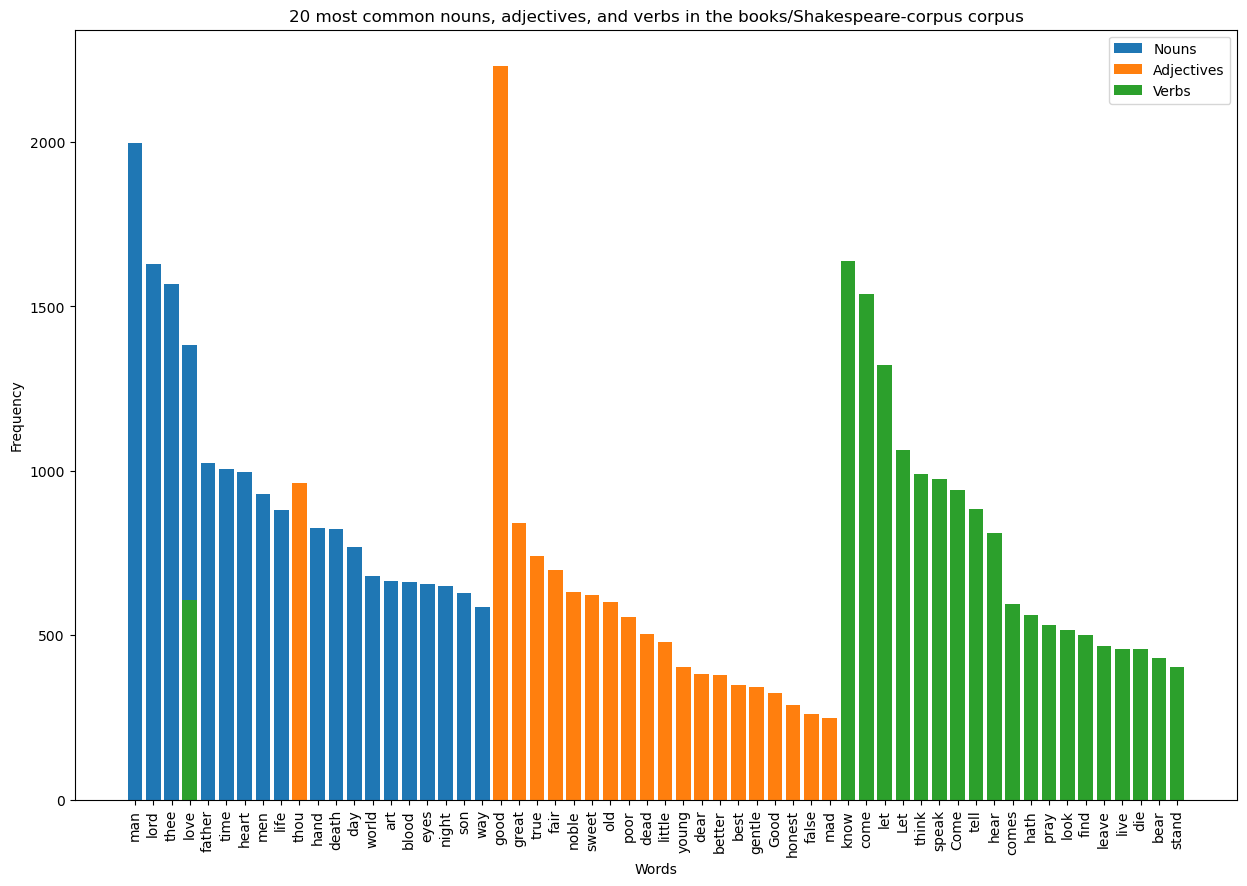

20 most common nouns, adjectives, and verbs in the books/Marlowe-corpus corpus


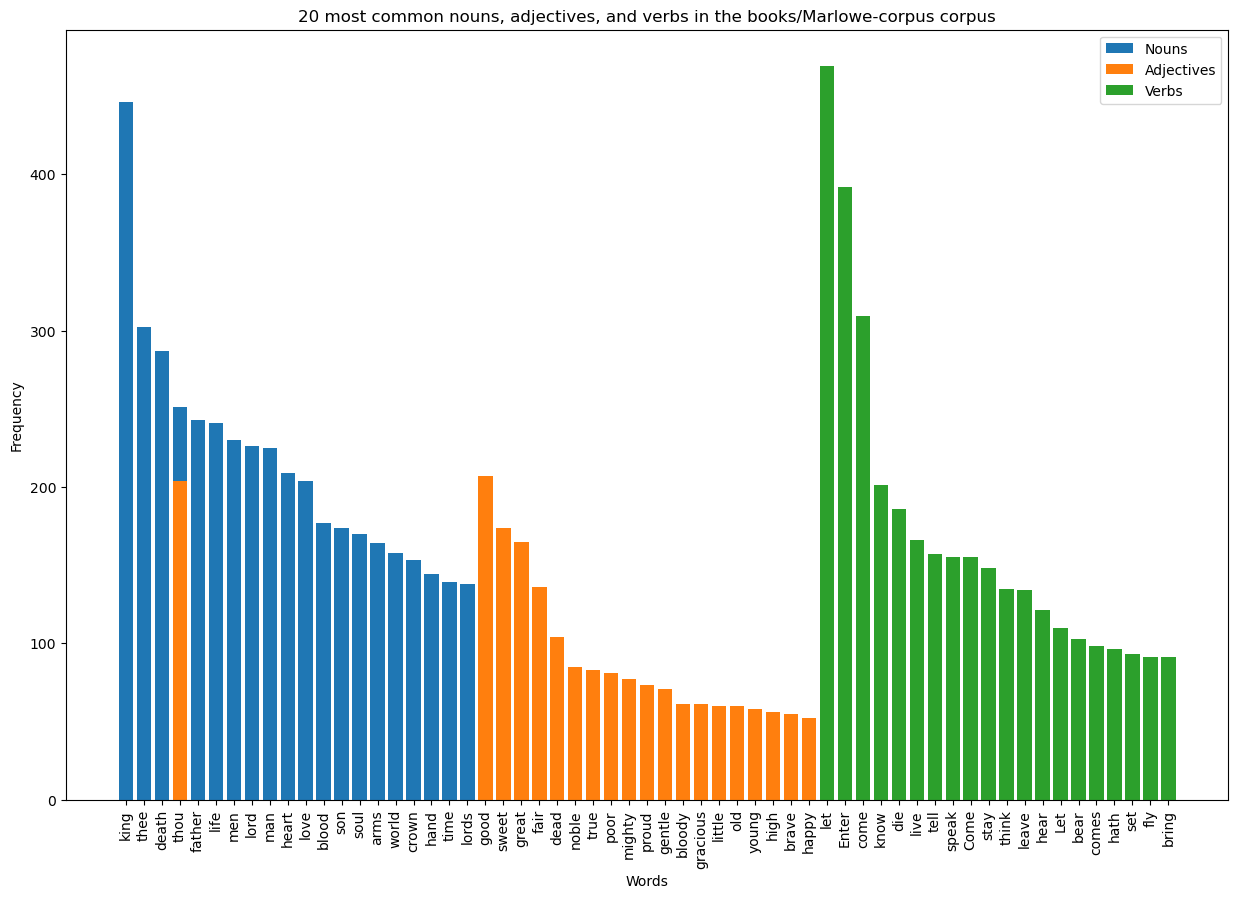

In [1]:
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import glob
%matplotlib inline

def plot_common_words(directory):
    nlp = spacy.load("en_core_web_md")

    nouns_all = []
    adjectives_all = []
    verbs_all = []

    for file_path in glob.glob(directory + "/*.txt"):
        with open(file_path, "r") as file:
            text = file.read()

        doc = nlp(text)

        nouns = []
        adjectives = []
        verbs = []

        for token in doc:
            if token.pos_ == "NOUN" and not token.is_stop and not token.is_punct and token.lemma_.isalpha() and len(token.lemma_) > 2:
                nouns.append(token.text)
            elif token.pos_ == "ADJ" and not token.is_stop and not token.is_punct and token.lemma_.isalpha() and len(token.lemma_) > 2:
                adjectives.append(token.text)
            elif token.pos_ == "VERB" and not token.is_stop and not token.is_punct and token.lemma_.isalpha() and len(token.lemma_) > 2:
                verbs.append(token.text)

        nouns_all.extend(nouns)
        adjectives_all.extend(adjectives)
        verbs_all.extend(verbs)

    nouns_fd = Counter(nouns_all)
    adjectives_fd = Counter(adjectives_all)
    verbs_fd = Counter(verbs_all)

    count_of_words = 20

    nouns_30 = nouns_fd.most_common(count_of_words)
    adjectives_30 = adjectives_fd.most_common(count_of_words)
    verbs_30 = verbs_fd.most_common(count_of_words)

    nouns_30_words = []
    adjectives_30_words = []
    verbs_30_words = []
    nouns_30_freq = []
    adjectives_30_freq = []
    verbs_30_freq = []

    for word, freq in nouns_30:
        nouns_30_words.append(word)
        nouns_30_freq.append(freq)

    for word, freq in adjectives_30:
        adjectives_30_words.append(word)
        adjectives_30_freq.append(freq)

    for word, freq in verbs_30:
        verbs_30_words.append(word)
        verbs_30_freq.append(freq)

    print(f"{count_of_words} most common nouns, adjectives, and verbs in the {directory} corpus")
    plt.figure(figsize=(15, 10))
    plt.bar(nouns_30_words, nouns_30_freq, label="Nouns")
    plt.bar(adjectives_30_words, adjectives_30_freq, label="Adjectives")
    plt.bar(verbs_30_words, verbs_30_freq, label="Verbs")
    plt.xticks(rotation=90)
    plt.legend()
    plt.title(f"{count_of_words} most common nouns, adjectives, and verbs in the {directory} corpus")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()

# Example usage:
plot_common_words("books/Shakespeare-corpus")
plot_common_words("books/Marlowe-corpus")